# Oil Price Prediction

## Objective:

Oil is a product that goes completely in a different direction for a single market event as the oil prices are rarely based on real-time data, instead, it is driven by externalities making our attempt to forecast it even more challenging As the economy will be highly affected by oil prices our model will help to understand the pattern in prices to help the customers and businesses to make smart decisions.

### Sample Data Set Details:

*Extraction the data from various web sources.*

The following data is extracted from: [eia](https://www.eia.gov/)

# Importing Libraries

In [1]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from pandas import DataFrame 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import lag_plot 
from statsmodels.tsa.stattools import adfuller 
from numpy import sqrt
from numpy import log
from numpy import cbrt
from numpy import exp
import statsmodels.formula.api as smf 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pmd
from pmdarima import auto_arima 
from statsmodels.tsa.arima.model import ARIMA 
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore') 

# Loading Data

In [2]:
#Loading Dataset
df = pd.read_csv('oil data update.csv')
df

Date  Price
0     02-01-1986  25.56
1     03-01-1986  26.00
2     06-01-1986  26.53
3     07-01-1986  25.85
4     08-01-1986  25.87
...          ...    ...
9340  15-12-2022  76.11
9341  16-12-2022  74.29
9342  19-12-2022  75.19
9343  20-12-2022  76.09
9344  21-12-2022  78.29

[9345 rows x 2 columns]

# Descriptive Statisitics

In [3]:
df.describe()

Price
count  9339.000000
mean     46.028511
std      29.515461
min       9.060000
25%      20.000000
50%      36.060000
75%      66.910000
max     145.310000

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9345 non-null   object 
 1   Price   9339 non-null   float64
dtypes: float64(1), object(1)
memory usage: 146.1+ KB
None


In [5]:
print(df.shape)

(9345, 2)


In [6]:
df.duplicated().sum()

0

In [7]:
df.mean()

Price    46.028511
dtype: float64

In [8]:
df.var()

Price    871.16243
dtype: float64

In [9]:
df.kurt()

Price   -0.553953
dtype: float64

In [10]:
df.skew()

Price    0.761338
dtype: float64

In [11]:
#Checking is there any missing values are there in data or not
df.isnull().any()

Date     False
Price     True
dtype: bool

In [12]:
df.isna().sum()

Date     0
Price    6
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

Date  Price
8060  23-11-2017    NaN
8082  25-12-2017    NaN
8087  01-01-2018    NaN
8097  15-01-2018    NaN
8122  19-02-2018    NaN
8151  30-03-2018    NaN

There are 6 null values present in our data. so, we can either drop them or apply imputation technique to fill the null values.

In [14]:
mean = df['Price'].mean()
print(mean)

46.02851054716778


## Compensating Null Values

##### imputation technique for null values

In [15]:
df['Price']=df['Price'].fillna(mean)
df.head()

Date  Price
0  02-01-1986  25.56
1  03-01-1986  26.00
2  06-01-1986  26.53
3  07-01-1986  25.85
4  08-01-1986  25.87

In [16]:
df1=df.copy()
df1.head()

Date  Price
0  02-01-1986  25.56
1  03-01-1986  26.00
2  06-01-1986  26.53
3  07-01-1986  25.85
4  08-01-1986  25.87

# EDA

In [17]:
df1['Date']=pd.to_datetime(df1.Date)
df1.head()

Date  Price
0 1986-02-01  25.56
1 1986-03-01  26.00
2 1986-06-01  26.53
3 1986-07-01  25.85
4 1986-08-01  25.87

In [18]:
df1.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [19]:
df1['Year'] = df1['Date'].dt.year
df1.head()

Date  Price  Year
0 1986-02-01  25.56  1986
1 1986-03-01  26.00  1986
2 1986-06-01  26.53  1986
3 1986-07-01  25.85  1986
4 1986-08-01  25.87  1986

In [20]:
df1.corr()

Price      Year
Price  1.000000  0.723501
Year   0.723501  1.000000

(array([0.5, 1.5]), [Text(0.5, 0, 'Price'), Text(1.5, 0, 'Year')])

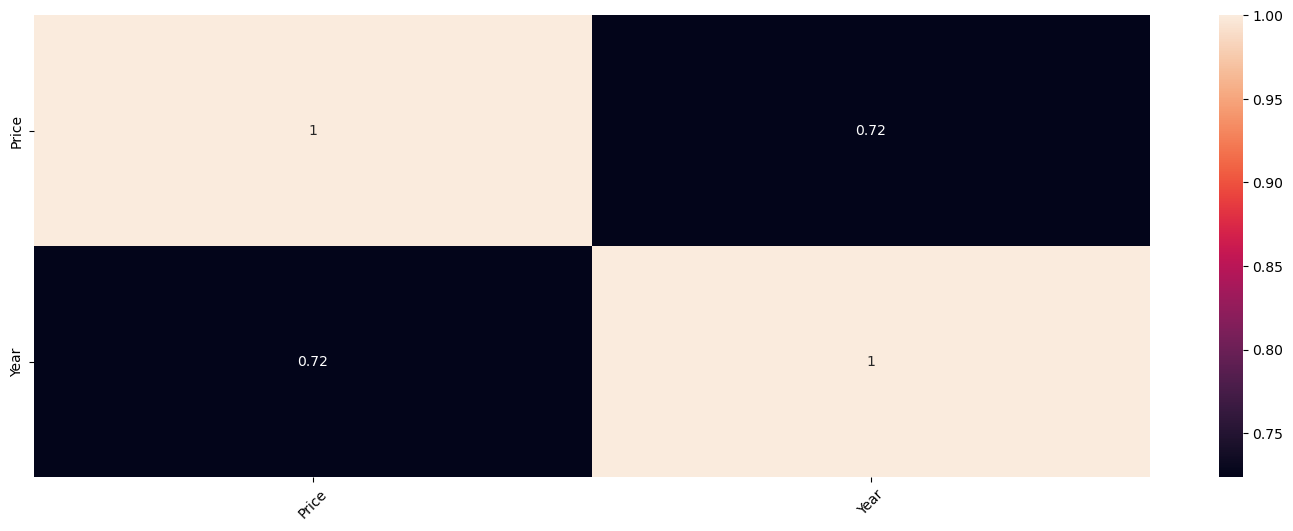

In [21]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)

## Data Visualization

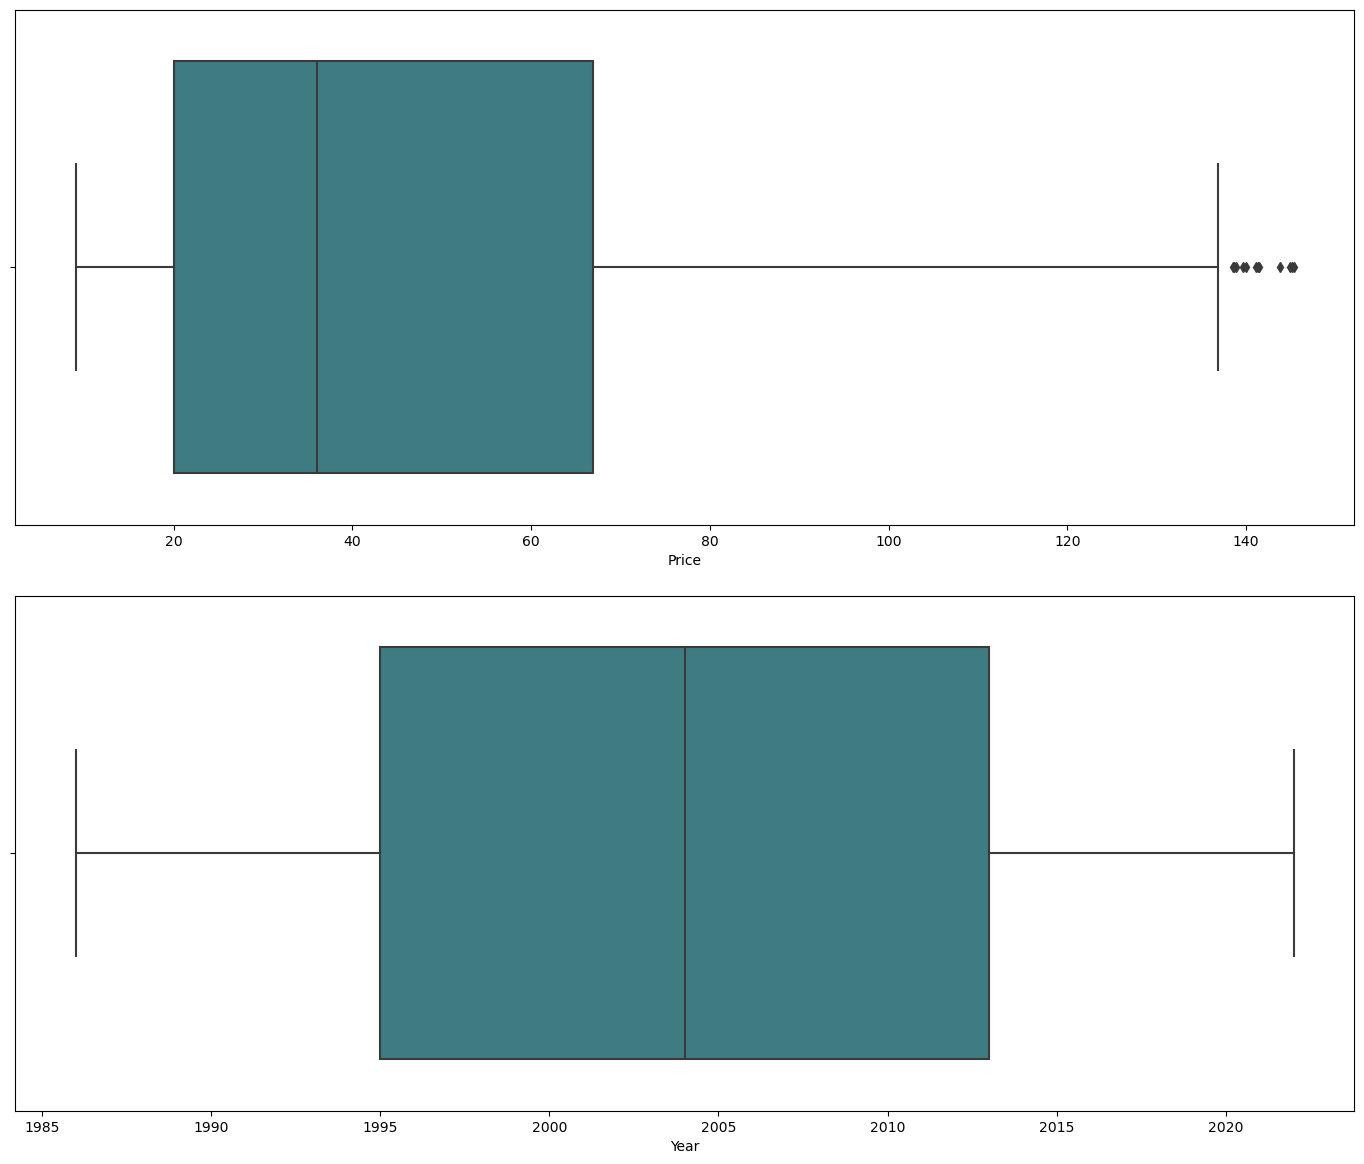

In [22]:
ot=df1.copy() 
fig, axes=plt.subplots(2,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Year',data=ot,palette='crest',ax=axes[1])
plt.tight_layout(pad=2.0)

<AxesSubplot: ylabel='Density'>

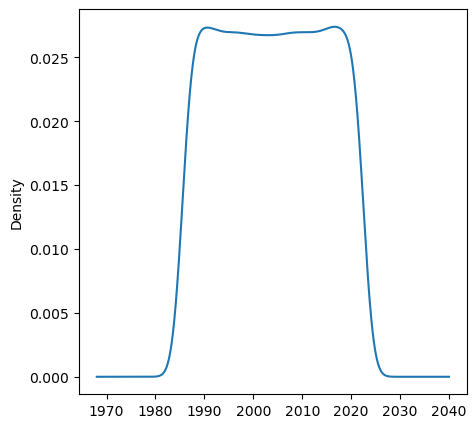

In [23]:
plt.figure(figsize=(5,5))
df1['Year'].plot(kind='density')

<AxesSubplot: xlabel='Year', ylabel='Density'>

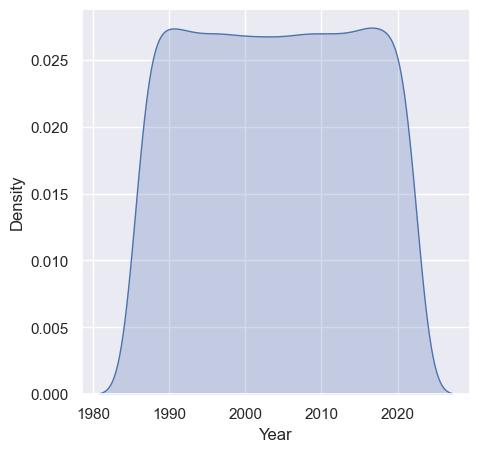

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df1['Year'], shade=True)

<AxesSubplot: xlabel='Year', ylabel='Density'>

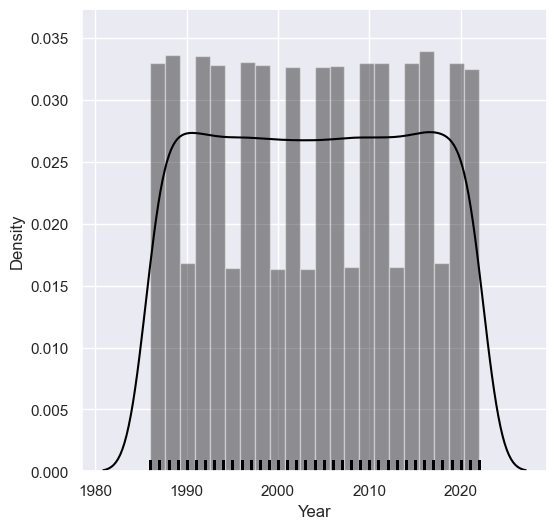

In [25]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df1['Year'], color='black', rug=True)

<AxesSubplot: >

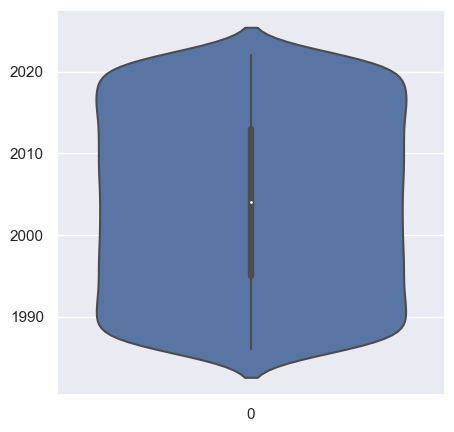

In [26]:
sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(df1['Year'], orient='vertical')

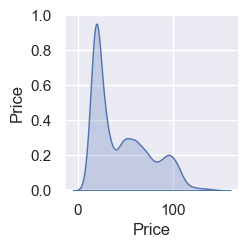

In [27]:
g = sns.pairplot(df, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

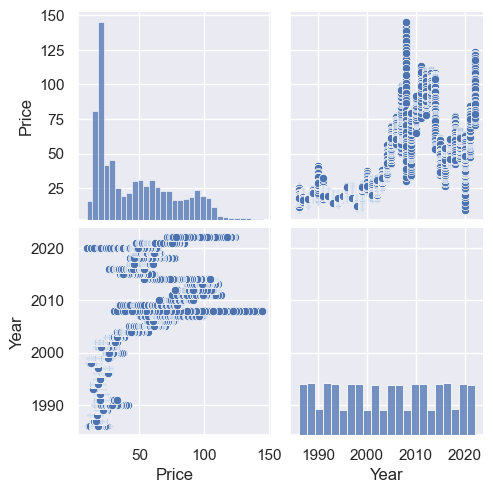

In [28]:
sns.pairplot(df1)

<AxesSubplot: xlabel='Year', ylabel='count'>

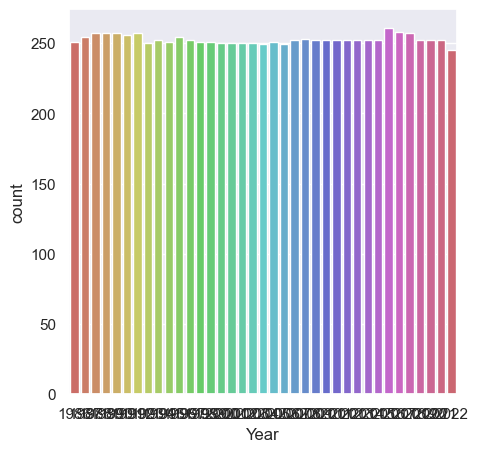

In [29]:
sns.countplot(x = 'Year', data = df1, palette = 'hls')

In [30]:
df.set_index('Date', inplace=True)
df.head()

Price
Date             
02-01-1986  25.56
03-01-1986  26.00
06-01-1986  26.53
07-01-1986  25.85
08-01-1986  25.87

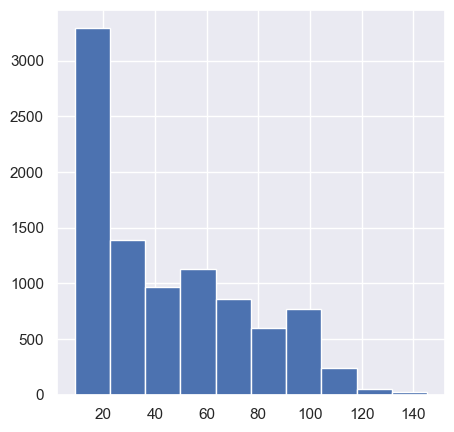

In [31]:
#Outlier detection
plt.hist(df['Price'])
plt.show()

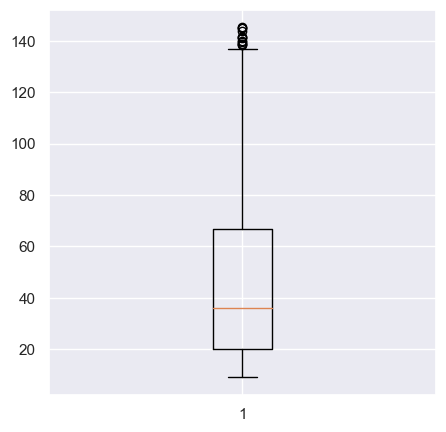

In [32]:
plt.boxplot(df['Price'])
plt.show()

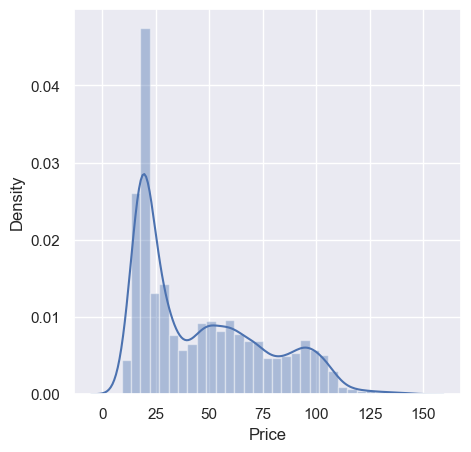

In [33]:
sns.distplot(df['Price'])
plt.show()

In [34]:
Q1 = np.percentile(df,25,interpolation='midpoint')
Q1

20.0

In [35]:
Q3 = np.percentile(df,75,interpolation='midpoint')
Q3

66.9

In [36]:
IQR = Q3 - Q1
IQR

46.900000000000006

In [37]:
Q3+1.5*IQR 

137.25

In [38]:
Q1-1.5*IQR

-50.35000000000001

In [39]:
#Observations which are lying above the upper extreme point 
upper = np.where(df > (Q3+1.5*IQR)) 
upper 

(array([5659, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5682, 5683, 5684,
        5685], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [40]:
lower = np.where(df < (Q1-1.5*IQR)) 
lower

(array([], dtype=int64), array([], dtype=int64))

In [41]:
#Removing Outliers
df2=df.drop(df.index[[5659, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5682, 5683, 5684,5685]],axis=0)
df2.head()

Price
Date             
02-01-1986  25.56
03-01-1986  26.00
06-01-1986  26.53
07-01-1986  25.85
08-01-1986  25.87

In [42]:
df2.describe()

Price
count  9333.000000
mean     45.905668
std      29.325105
min       9.060000
25%      19.990000
50%      35.980000
75%      66.730000
max     136.910000

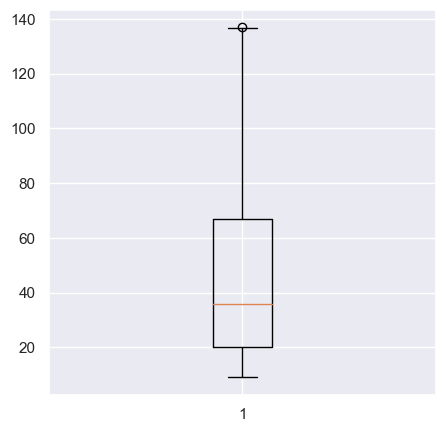

In [43]:
plt.boxplot(df2['Price'])
plt.show()

In [44]:
print(np.where(df2>=136.91))

(array([5662], dtype=int64), array([0], dtype=int64))


In [45]:
df3=df2.drop(df2.index[[5662]],axis=0)
df3.head()

Price
Date             
02-01-1986  25.56
03-01-1986  26.00
06-01-1986  26.53
07-01-1986  25.85
08-01-1986  25.87

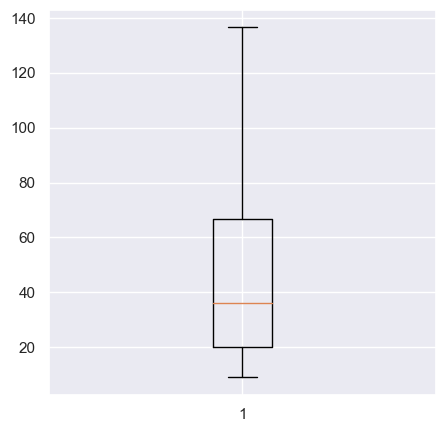

In [46]:
plt.boxplot(df3['Price'])
plt.show()

###### Now data is free from Outliers

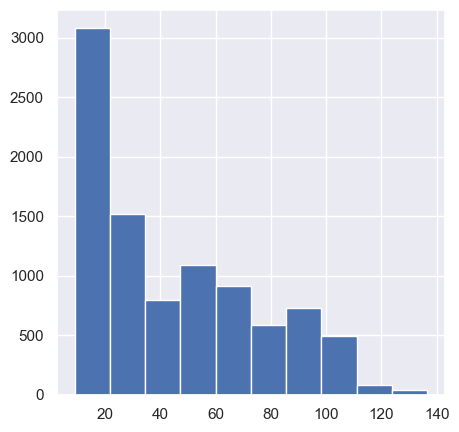

In [47]:
plt.hist(df3['Price'])
plt.show()

In [48]:
df3.describe()

Price
count  9332.000000
mean     45.895916
std      29.311539
min       9.060000
25%      19.990000
50%      35.975000
75%      66.730000
max     136.540000

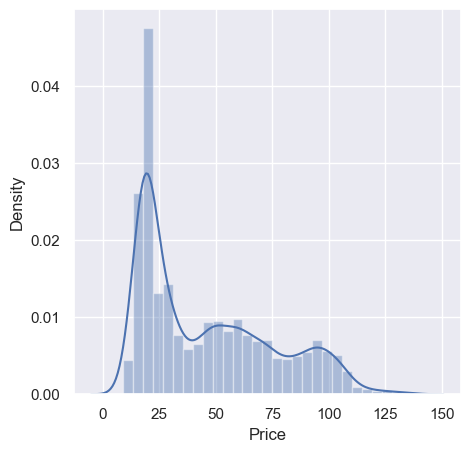

In [49]:
sns.distplot(df3['Price'])
plt.show()

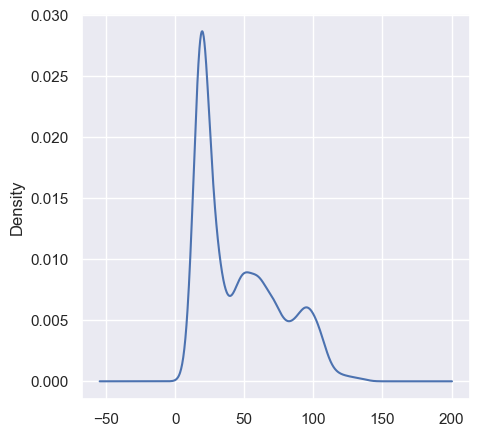

In [50]:
df3['Price'].plot(kind='kde')
plt.show()

In [51]:
df4=df3.reset_index()
df4.head()

Date  Price
0  02-01-1986  25.56
1  03-01-1986  26.00
2  06-01-1986  26.53
3  07-01-1986  25.85
4  08-01-1986  25.87

In [52]:
df4.dtypes

Date      object
Price    float64
dtype: object

In [53]:
df4['Date']=pd.to_datetime(df4.Date)
df4.head()

Date  Price
0 1986-02-01  25.56
1 1986-03-01  26.00
2 1986-06-01  26.53
3 1986-07-01  25.85
4 1986-08-01  25.87

In [54]:
df4.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [55]:
df4["Date"] = pd.to_datetime(df4.Date,format="%b-%y")
df4["Month"] = df4.Date.dt.strftime("%b") # month extraction
df4["Year"] = df4.Date.dt.strftime("%Y") # year extraction
df4.head()

Date  Price Month  Year
0 1986-02-01  25.56   Feb  1986
1 1986-03-01  26.00   Mar  1986
2 1986-06-01  26.53   Jun  1986
3 1986-07-01  25.85   Jul  1986
4 1986-08-01  25.87   Aug  1986

### Heatmap

<AxesSubplot: xlabel='Month', ylabel='Year'>

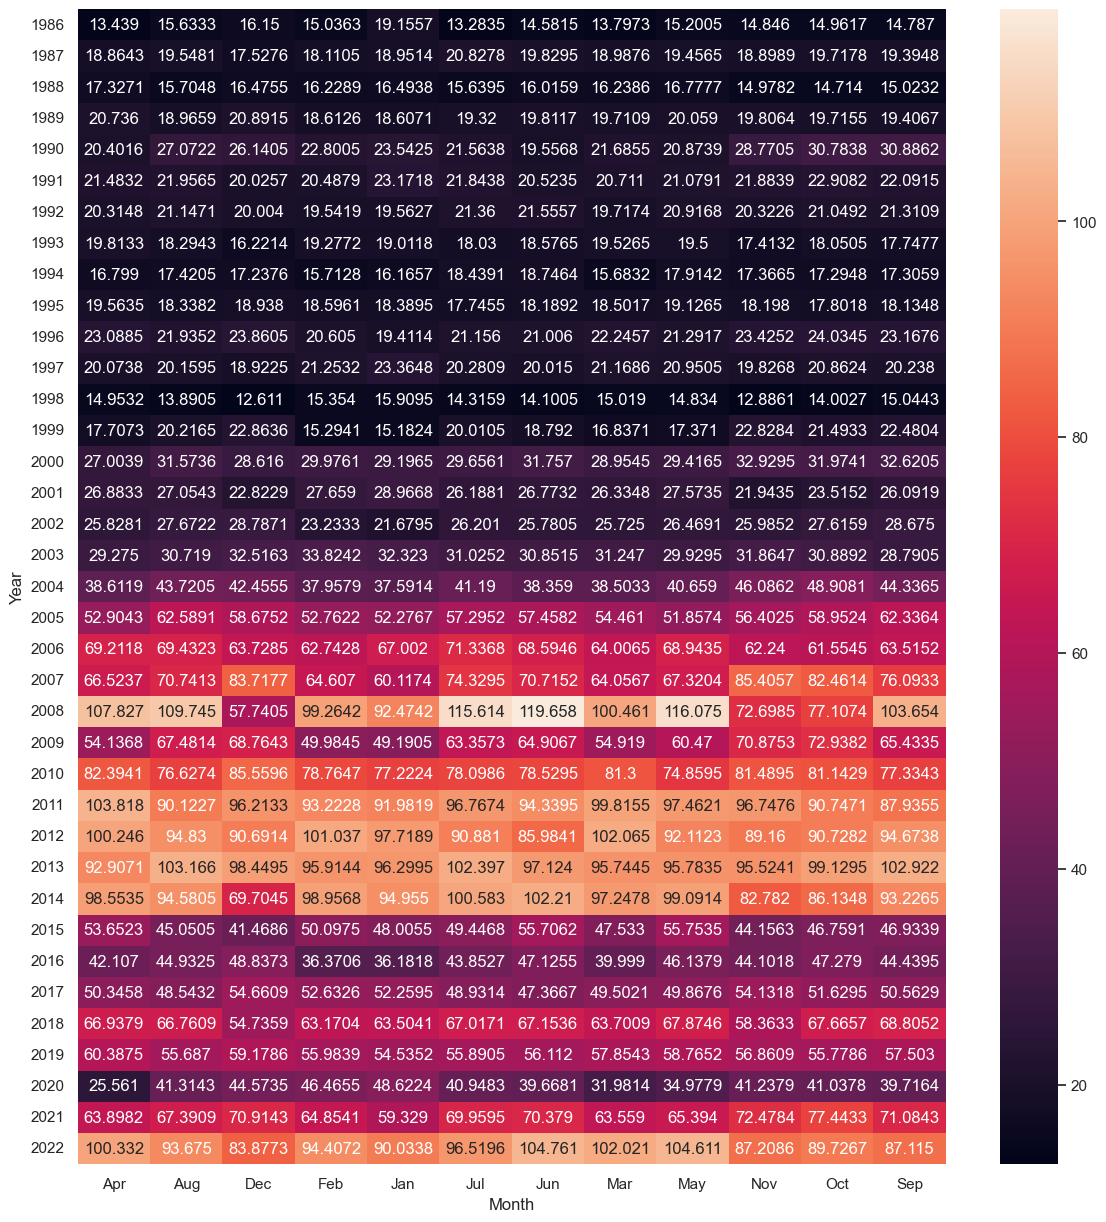

In [56]:
plt.figure(figsize=(14,15))
heatmap = pd.pivot_table(data=df4,values="Price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g") 

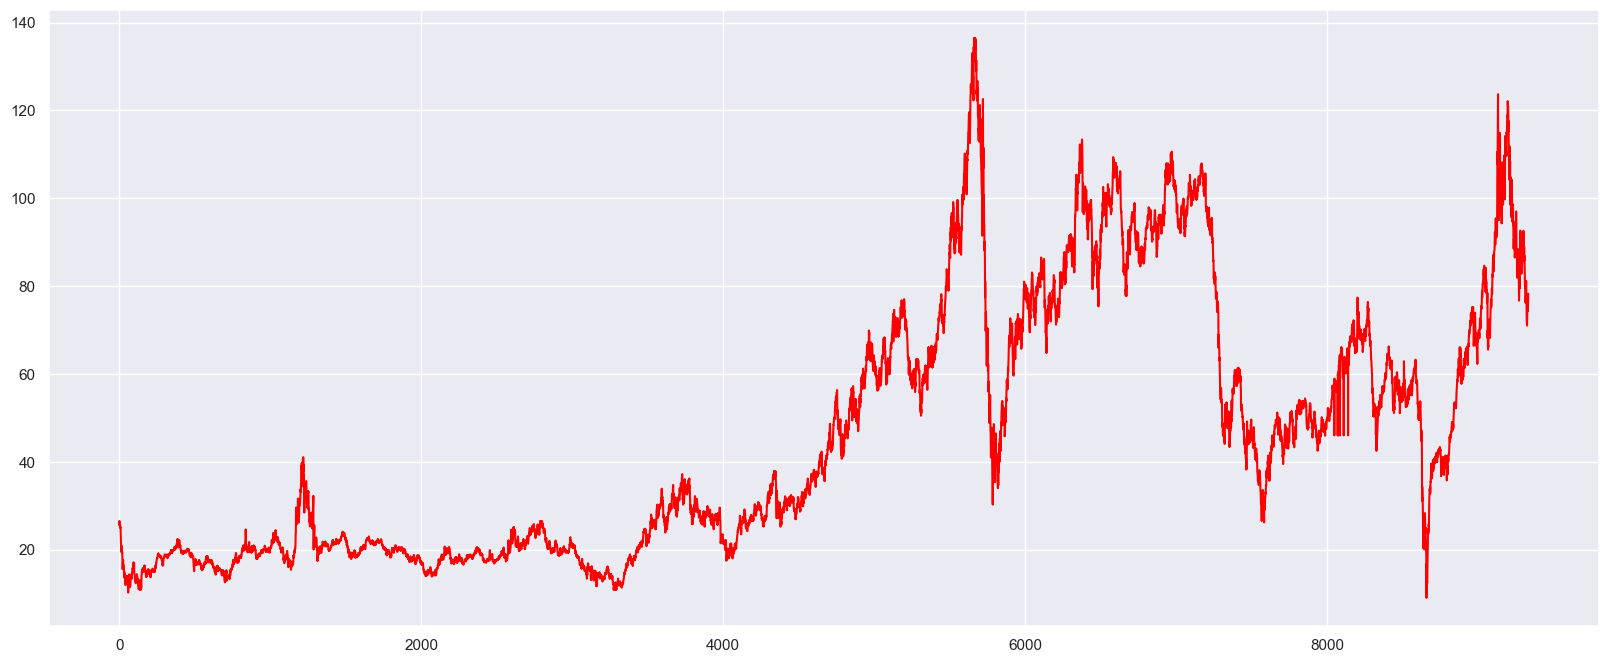

In [57]:
df4['Price'].plot(figsize=(20, 8),color='red')
plt.show()

<AxesSubplot: >

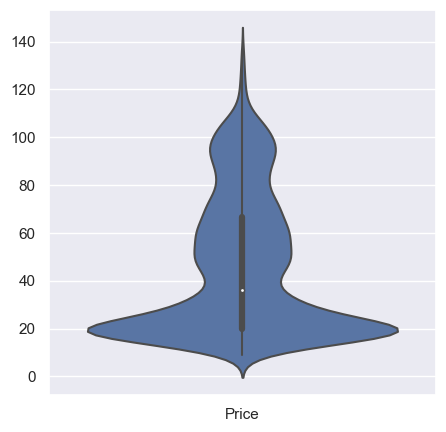

In [58]:
sns.violinplot(X='Date', Y='Price', data=df4) 

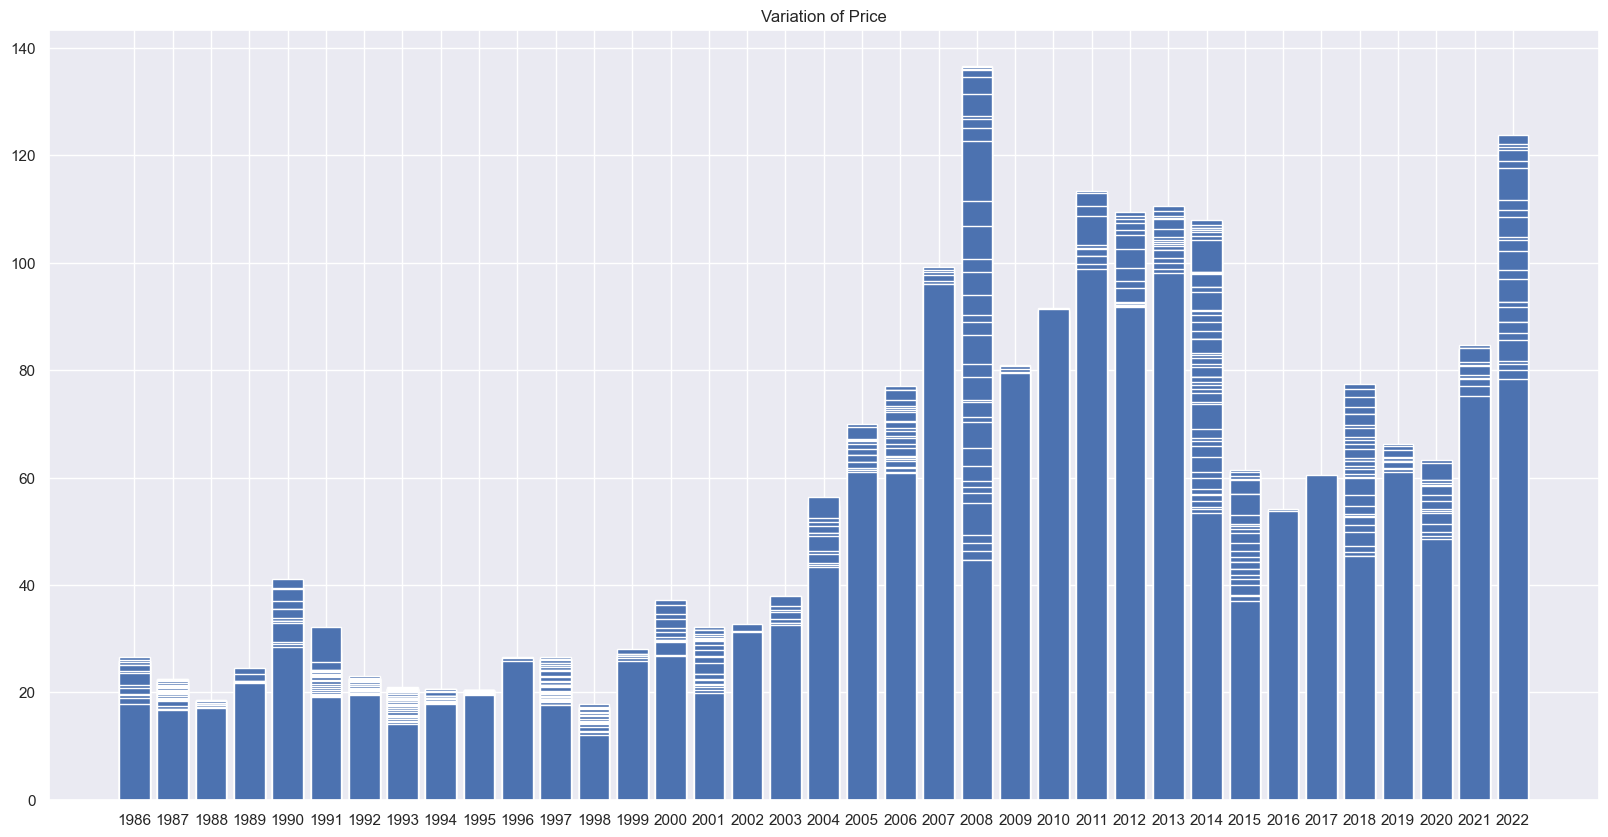

In [59]:
plt.figure(figsize=(20,10))
x=df4['Year']
y=df4['Price']
plt.bar(x,y)
plt.title('Variation of Price')
plt.show() 

<AxesSubplot: xlabel='Year', ylabel='Price'>

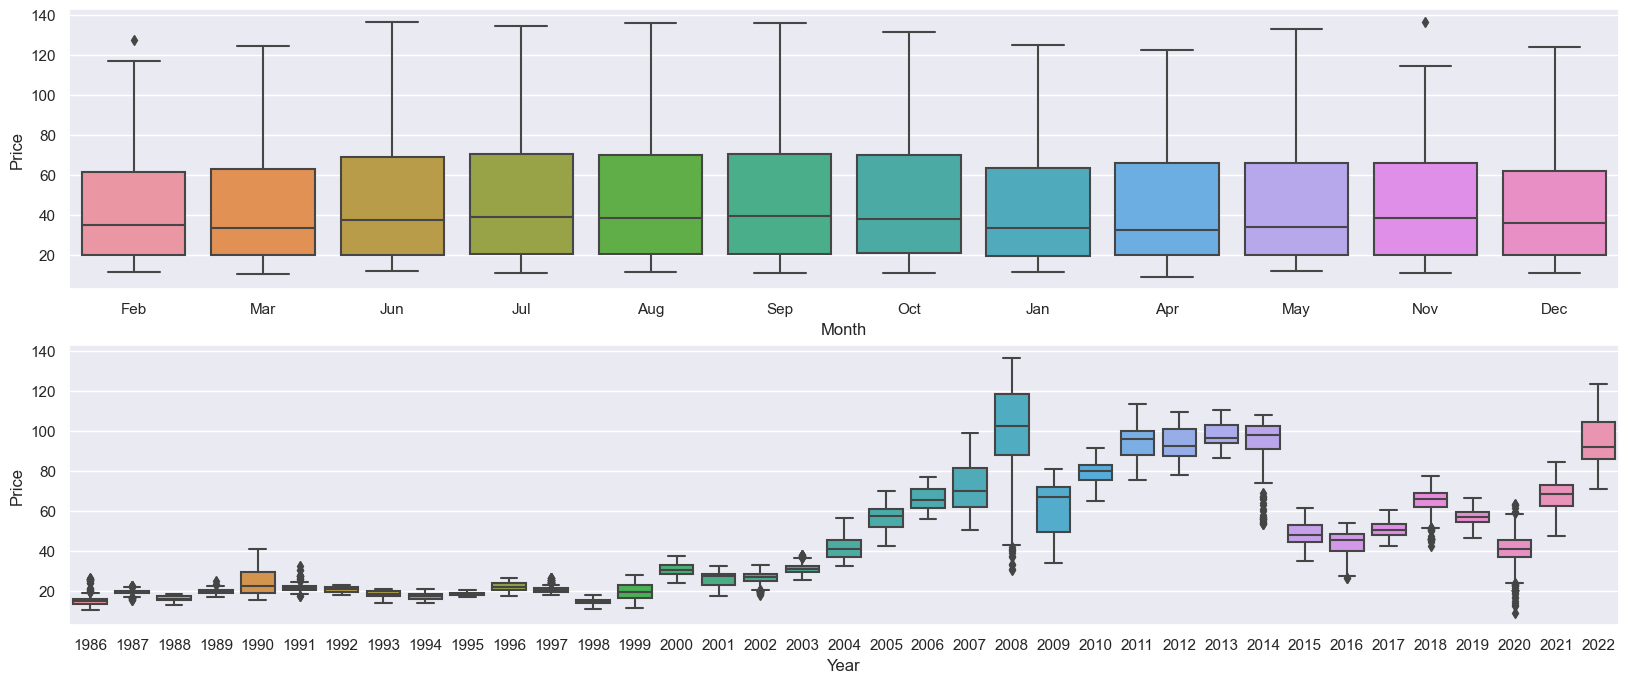

In [60]:
plt.figure(figsize= (20,8))
plt.subplot(211)
sns.boxplot(x="Month", y="Price", data= df4)
plt.subplot(212)
sns.boxplot(x="Year", y= "Price", data=df4) 

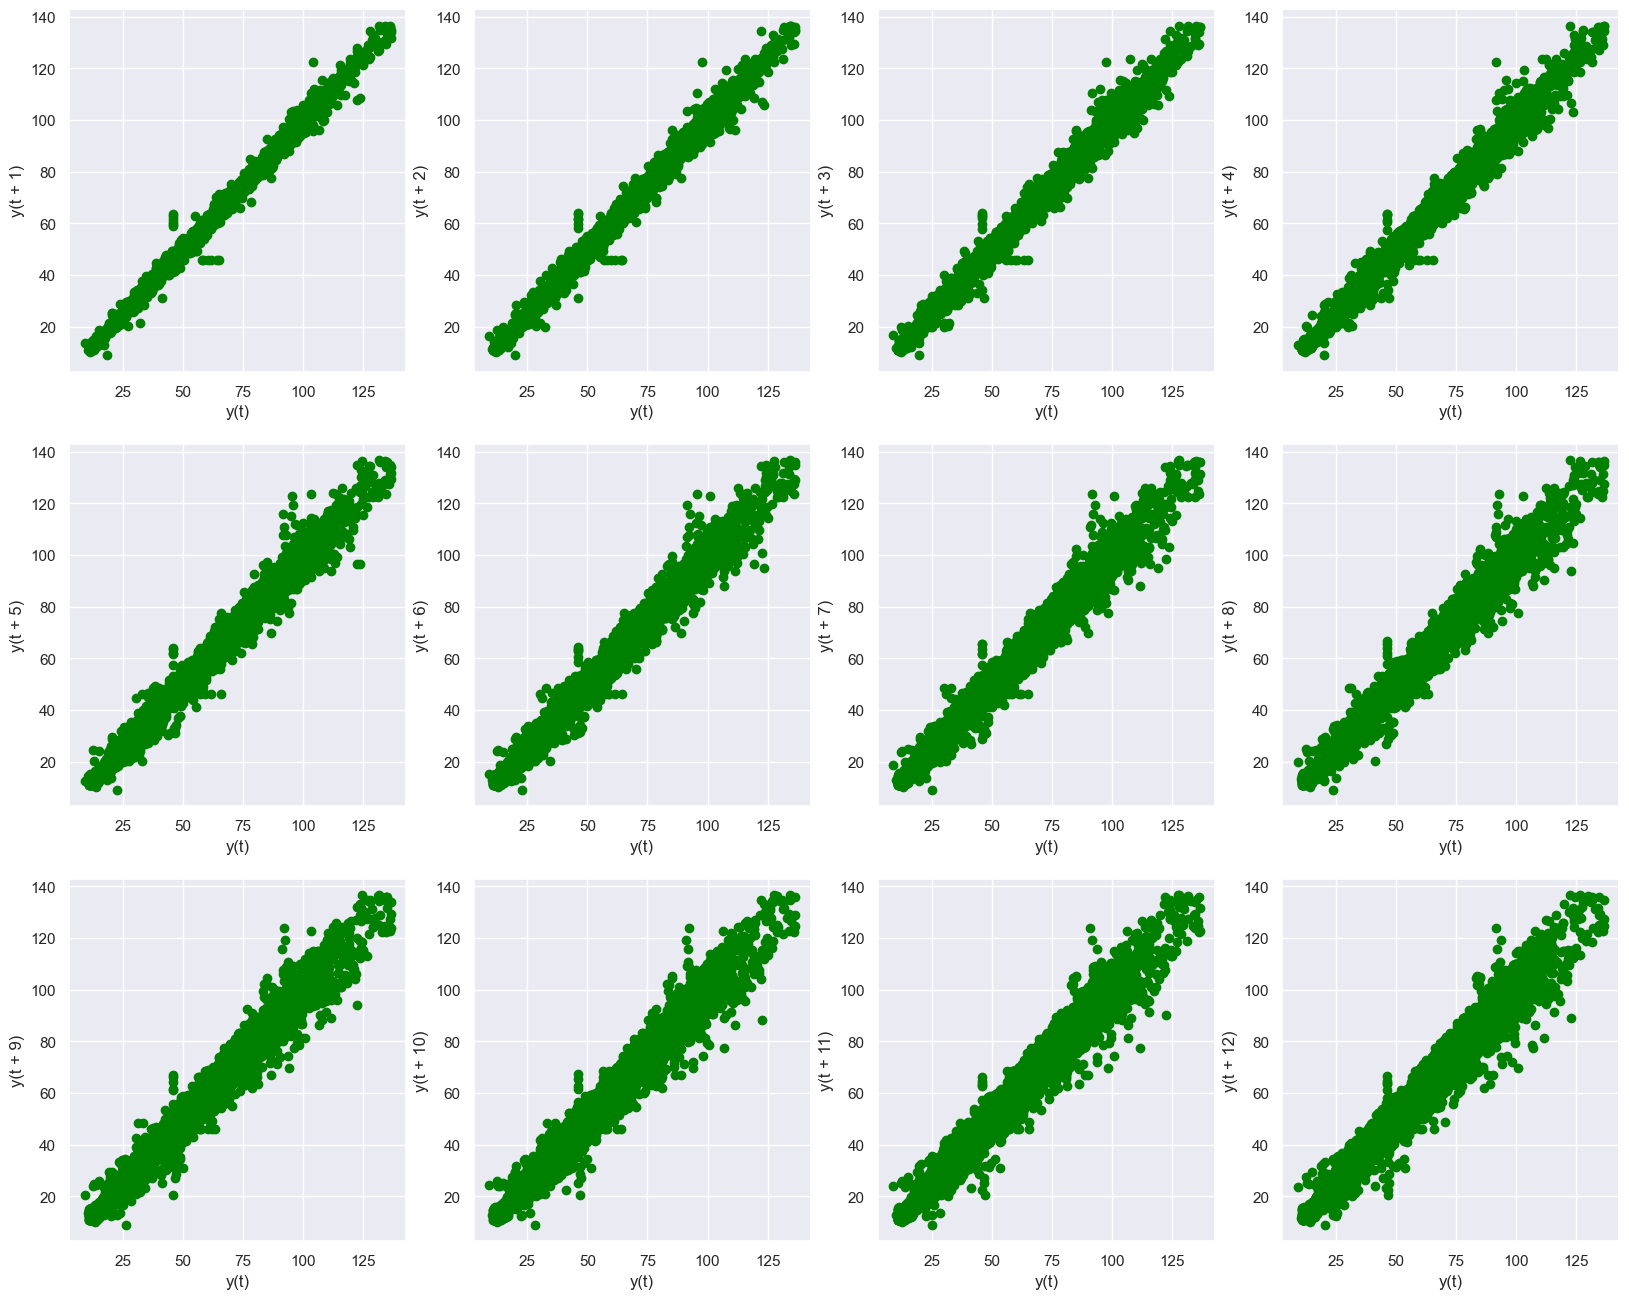

In [61]:
ig, axes = plt.subplots(figsize=(20,16), ncols=4, nrows=3)

lag_plot(df4.Price, lag=1, c = ['green'][0], ax=axes[0,0])
lag_plot(df4.Price, lag=2, c = ['green'][0], ax=axes[0,1])
lag_plot(df4.Price, lag=3, c = ['green'][0], ax=axes[0,2])
lag_plot(df4.Price, lag=4, c = ['green'][0], ax=axes[0,3])
lag_plot(df4.Price, lag=5, c = ['green'][0], ax=axes[1,0])
lag_plot(df4.Price, lag=6, c = ['green'][0], ax=axes[1,1])
lag_plot(df4.Price, lag=7, c = ['green'][0], ax=axes[1,2])
lag_plot(df4.Price, lag=8, c = ['green'][0], ax=axes[1,3])
lag_plot(df4.Price, lag=9, c = ['green'][0], ax=axes[2,0])
lag_plot(df4.Price, lag=10, c = ['green'][0], ax=axes[2,1])
lag_plot(df4.Price, lag=11, c = ['green'][0], ax=axes[2,2])
lag_plot(df4.Price, lag=12, c = ['green'][0], ax=axes[2,3])

plt.show() 

From the above lagplots, we can conclude that the data is having positive correlation with its lags.

# Time Seride Decomposition

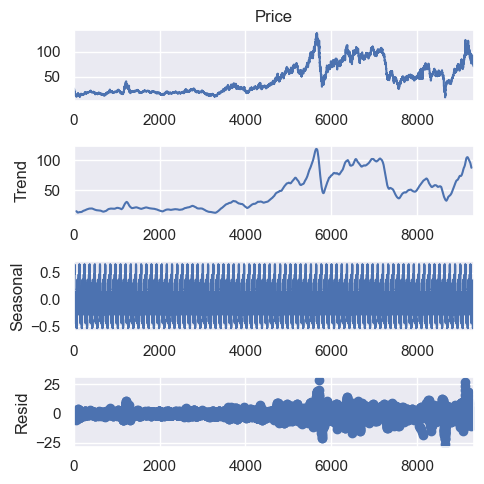

In [62]:
decomposition_ts_add = sm.tsa.seasonal_decompose(df4['Price'], model='additive',period=120)
fig = decomposition_ts_add.plot()
plt.show()

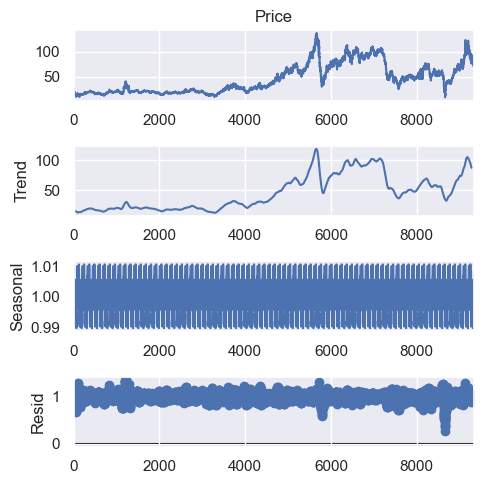

In [63]:
decomposition_ts_mult = sm.tsa.seasonal_decompose(df4['Price'], model='multiplicative',period=120)
fig = decomposition_ts_mult.plot()
plt.show()

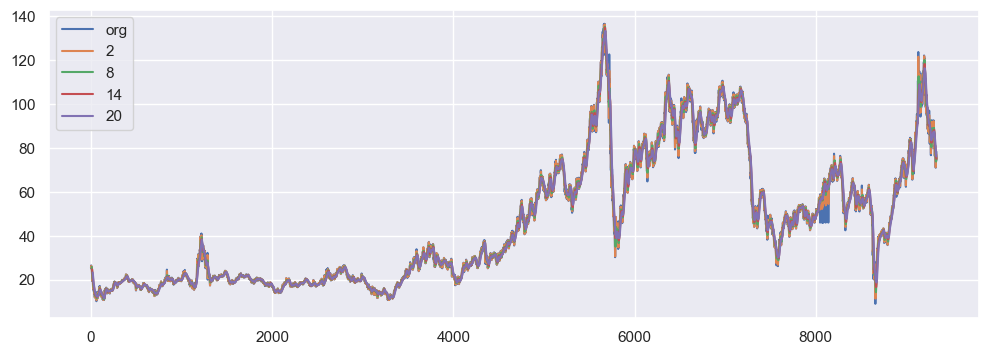

In [64]:
plt.figure(figsize=(12,4))
df4.Price.plot(label="org")
for i in range (2,24,6):
    df4["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

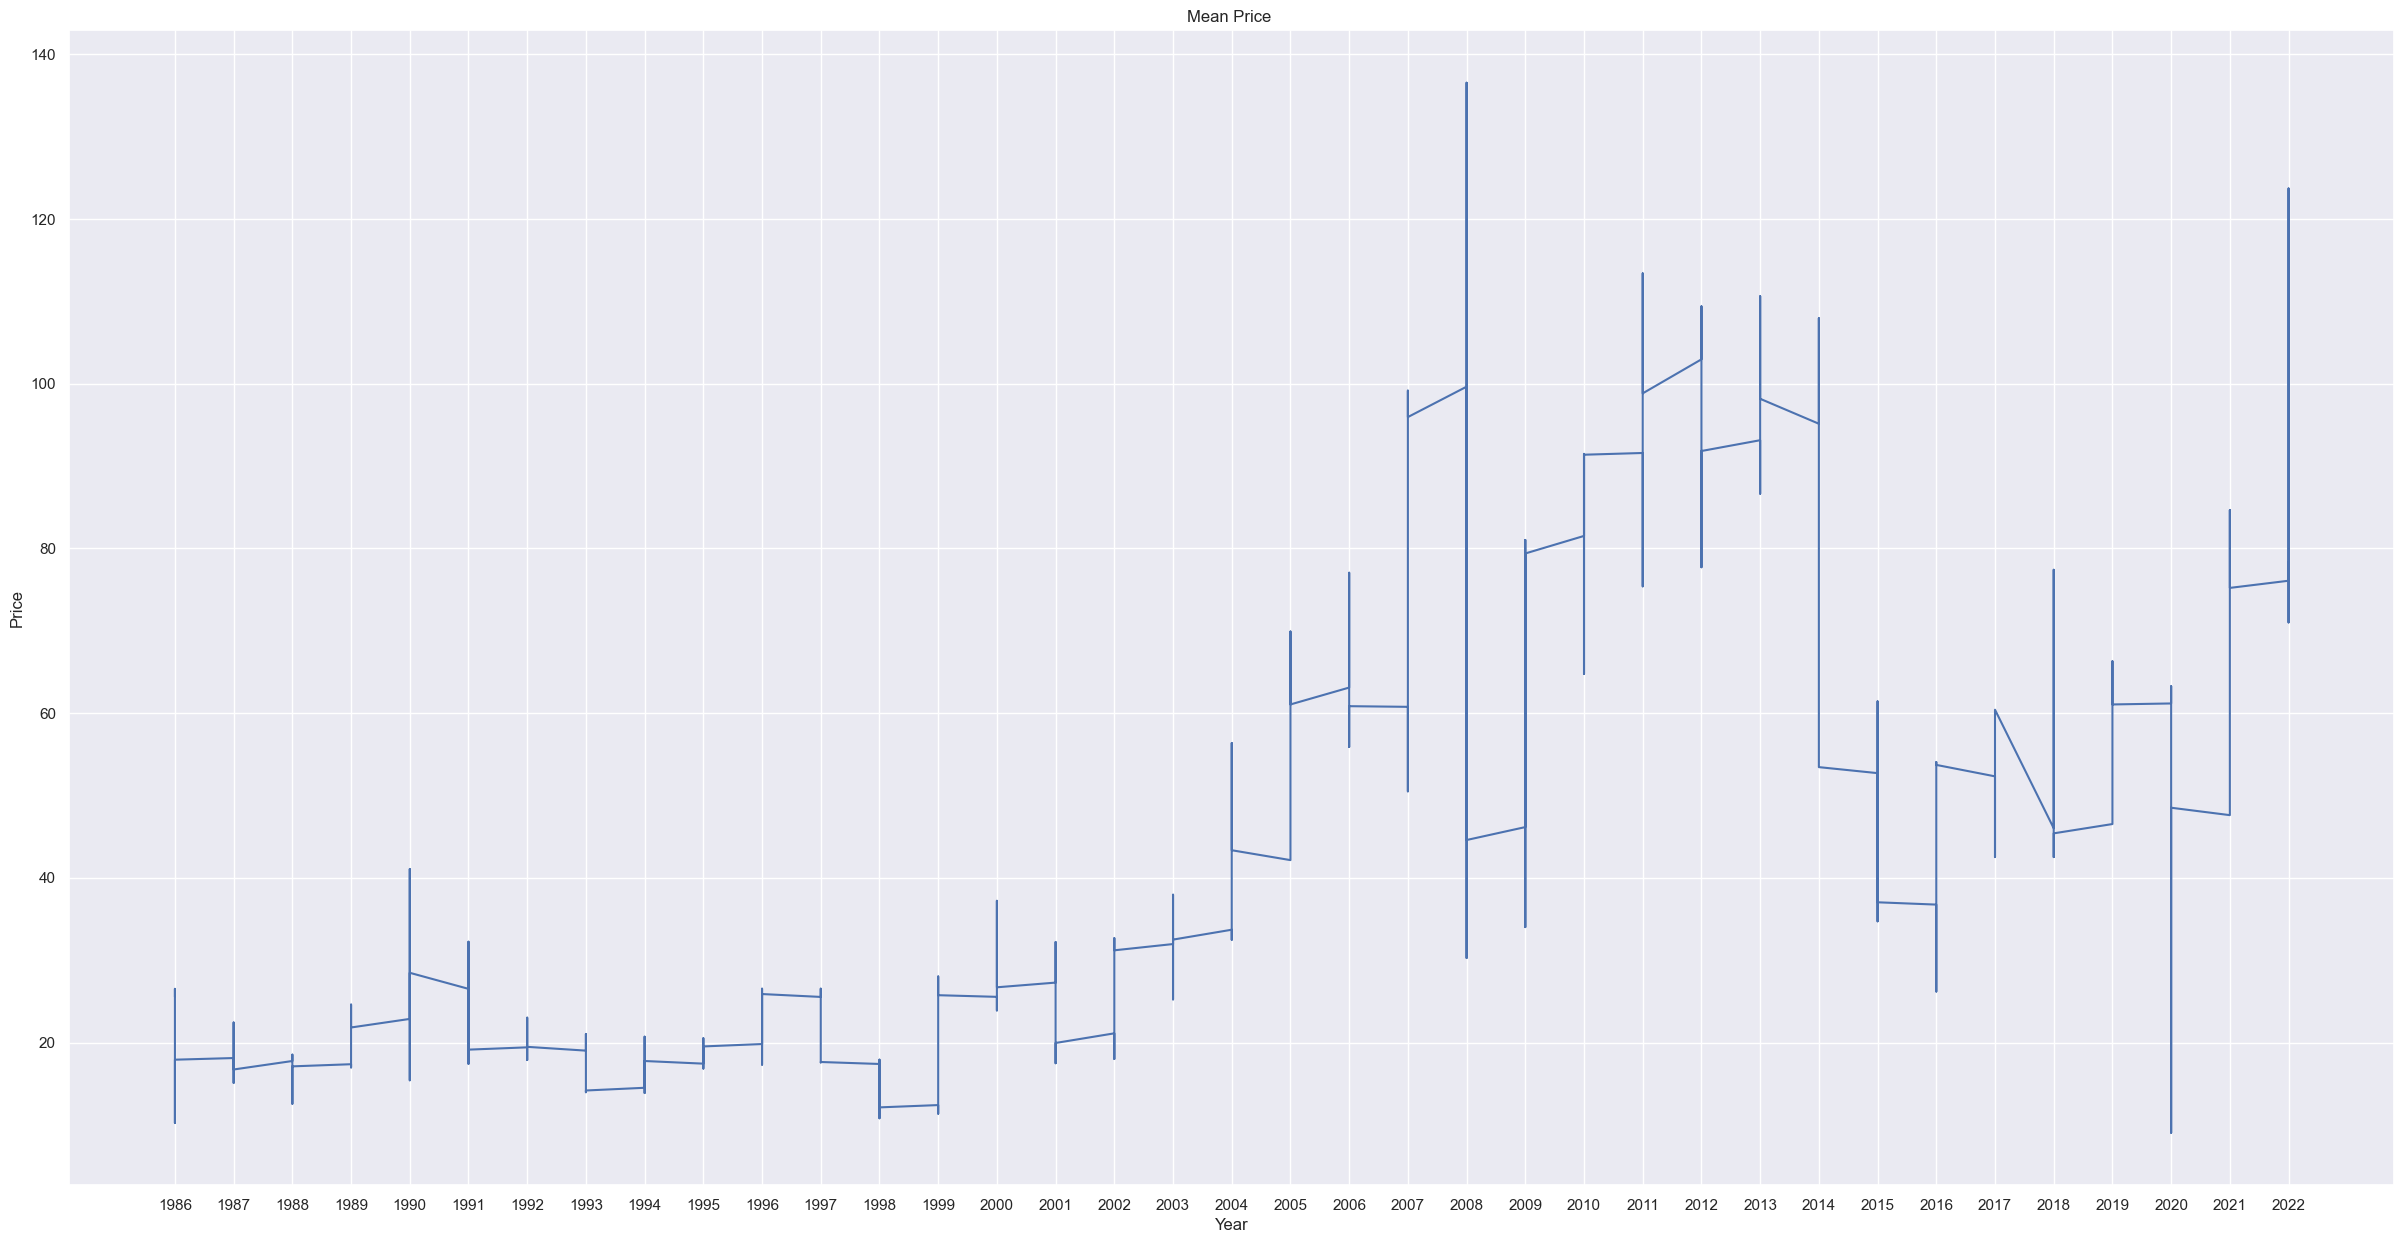

In [65]:
## Time series smoothing  (Stationarity of time series)
plt.figure(figsize=(30,15))
plt.plot(df4.Year,df4.Price)
plt.title("Mean Price ")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show() 
timeseries = df4.loc[:,["Year","Price"]]  ## creating timeseries 
timeseries.index = timeseries.Year
ts = timeseries.drop("Year",axis=1)

In [66]:
df3.head()

Price
Date             
02-01-1986  25.56
03-01-1986  26.00
06-01-1986  26.53
07-01-1986  25.85
08-01-1986  25.87

# Adfuller test (To check for the stationarity of our data)

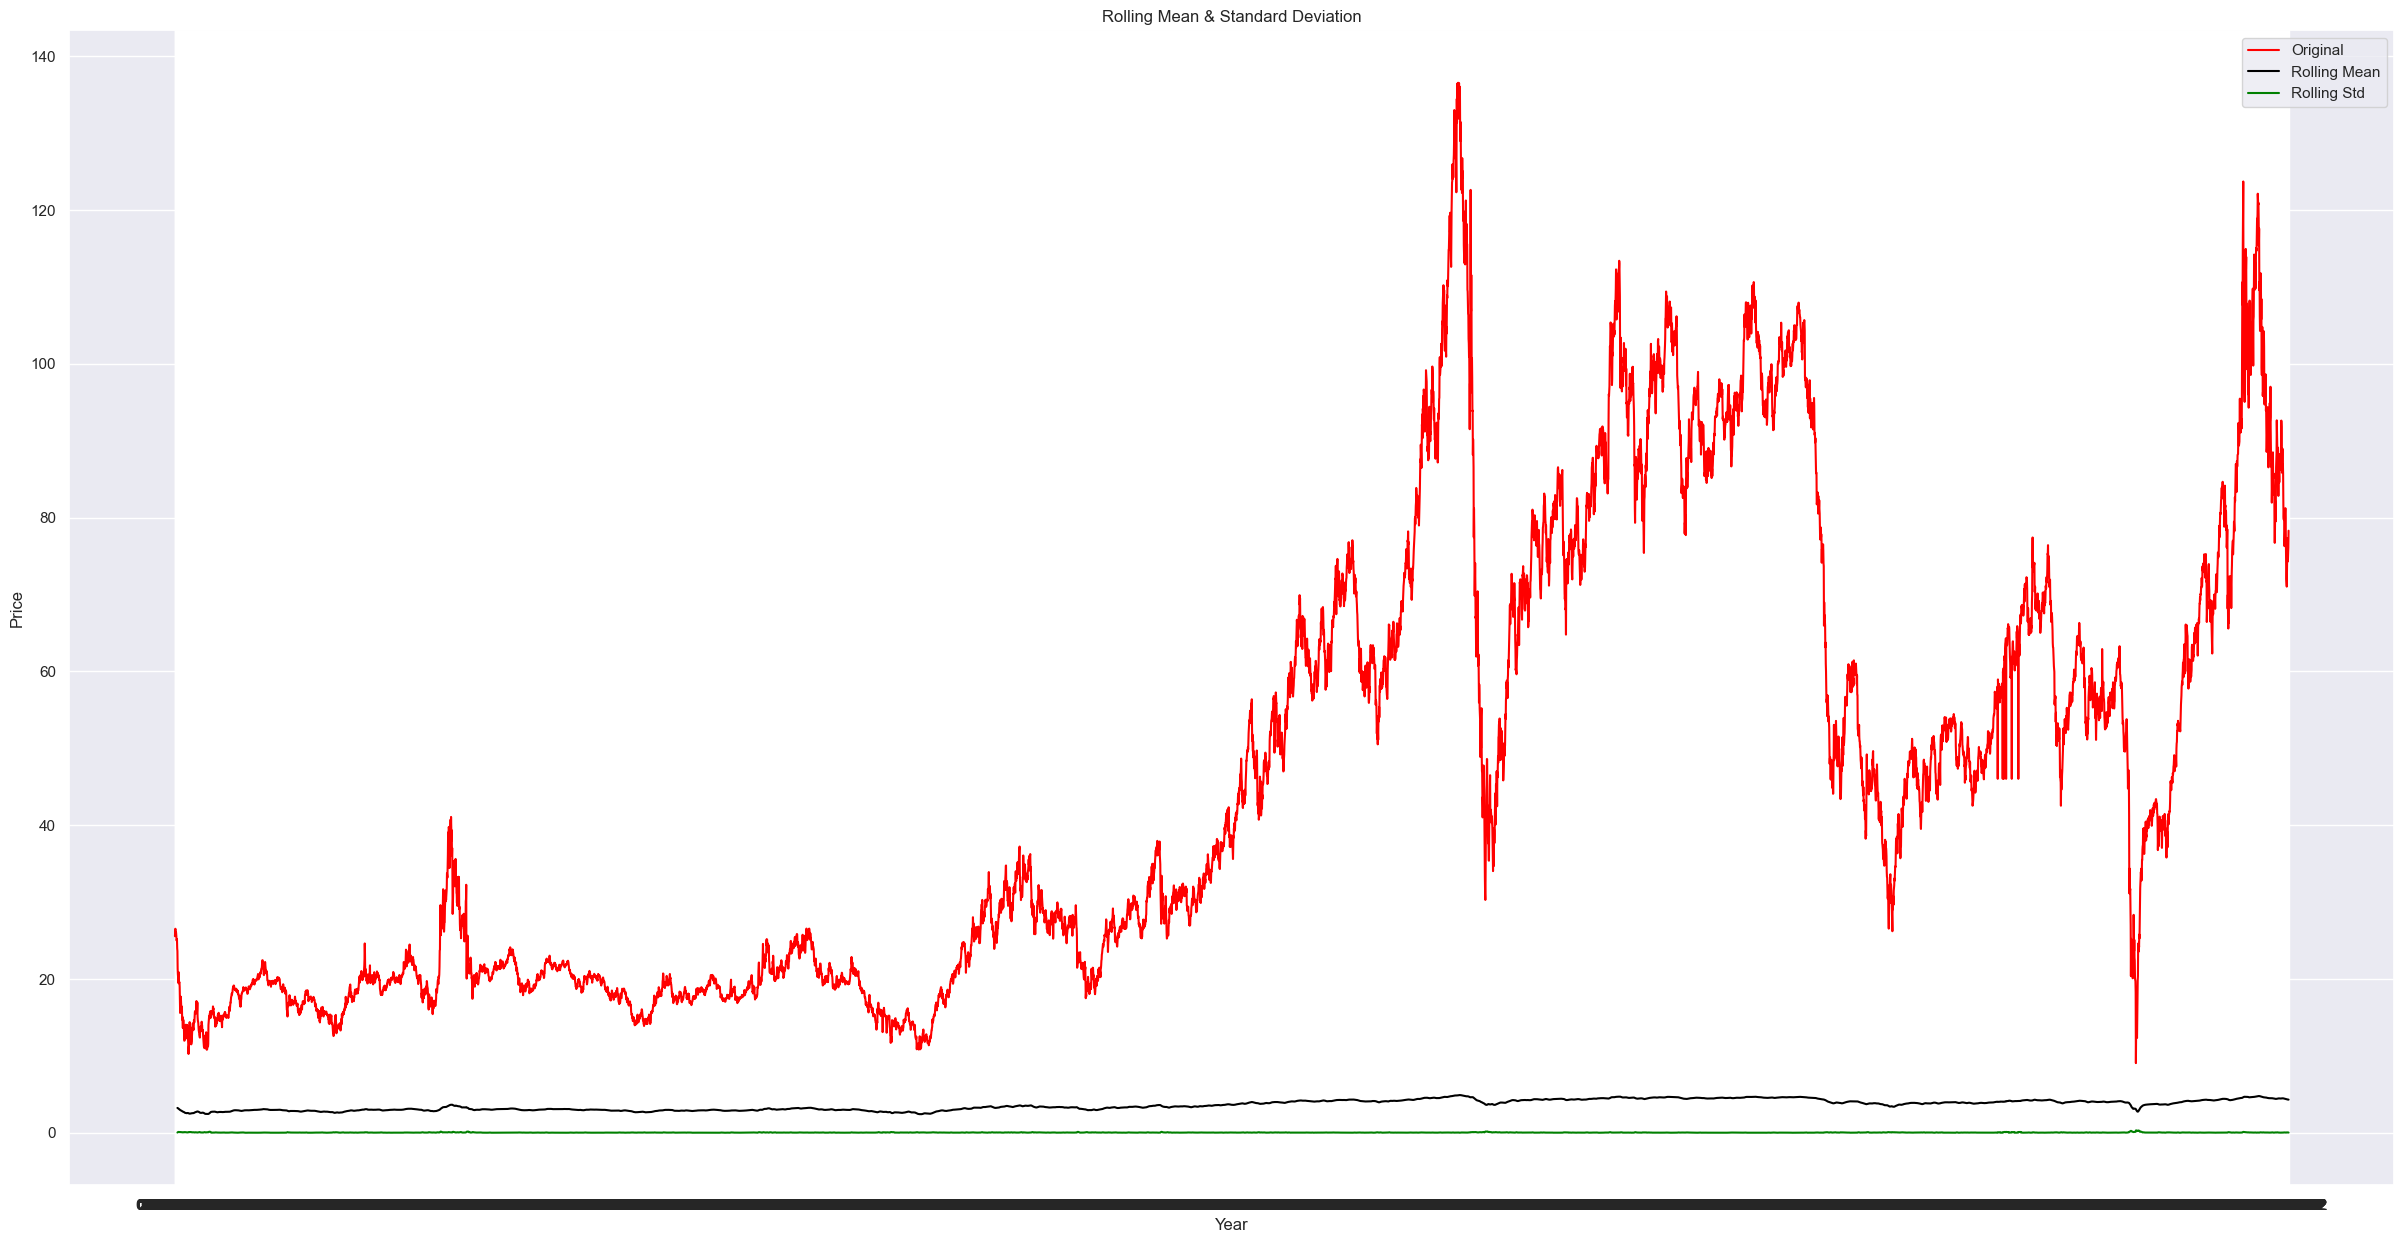

Test statistic: -2.3318047632916854
p-value: 0.16191534495545978
Critical Values: {'1%': -3.431053874661101, '5%': -2.861851068123899, '10%': -2.566935576484507}


In [67]:
#Nul hypothesis = non-stationary; Alternate hypothesis = Stationary
#if p-value > 0.05 - accept null hypothesis(data is non stationary) else accept alternate hypothesis(data is stationary)
def check_adfuller(df3):
    result = adfuller(df3,autolag='AIC')
    print('Test statistic:',result[0])
    print('p-value:',result[1])
    print('Critical Values:',result[4])
def check_mean_std(data3):
    df3_log = np.log(df3)
    moving_avg = df3_log.rolling(12).mean()
    moving_std = df3_log.rolling(12).std()
    plt.figure(figsize=(30,15))
    orig = plt.plot(data3,color = 'red',label = 'Original')
    mean = plt.plot(moving_avg, color = 'black',label= 'Rolling Mean')
    std = plt.plot(moving_std,color = 'green',label= 'Rolling Std')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
check_mean_std(df3)
check_adfuller(df3.Price) 

Here, the p value is greater than 0.05 (Critical value). So, Accept Null hypothesis i.e., The data is non stationary.

# Applying tranformations to convert non-stationary data to stationary data

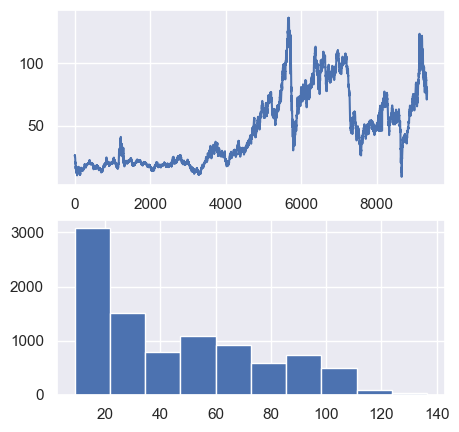

In [68]:
# Linear transform

dataframe_linear = DataFrame(df3.values)
dataframe_linear.columns = ['Price']

# line plot
plt.subplot(211)
plt.plot(dataframe_linear['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_linear['Price'])
plt.show() 

In [69]:
x_linear = dataframe_linear.values
result = adfuller(x_linear)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.331805
p-value: 0.161915
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


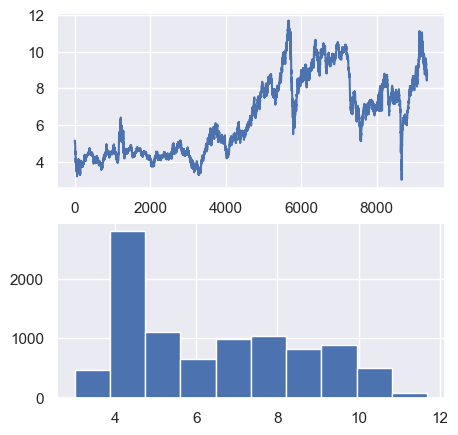

In [70]:
# Square root transform

dataframe_sqrt = DataFrame(df3.values)
dataframe_sqrt.columns = ['Price']
dataframe_sqrt['Price'] = sqrt (dataframe_sqrt['Price']) 

# line plot
plt.subplot(211)
plt.plot(dataframe_sqrt['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_sqrt['Price'])
plt.show()  

In [71]:
x_sqrt = dataframe_sqrt.values
result = adfuller(x_sqrt)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.076627
p-value: 0.254016
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


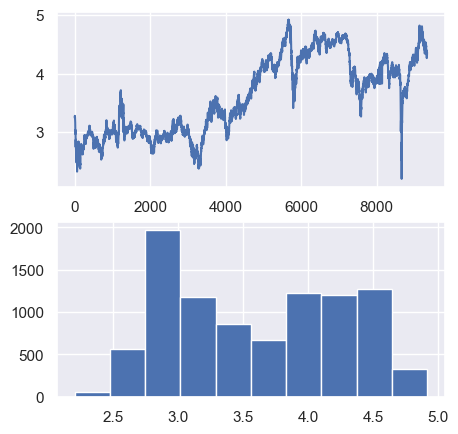

In [72]:
# Log transform

dataframe_log = DataFrame(df3.values)
dataframe_log.columns = ['Price']
dataframe_log['Price'] = log(dataframe_log['Price'])

# line plot
plt.subplot(211)
plt.plot(dataframe_log['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_log['Price'])
plt.show() 

In [73]:
x_log = dataframe_log.values
result = adfuller(x_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.051004
p-value: 0.264667
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


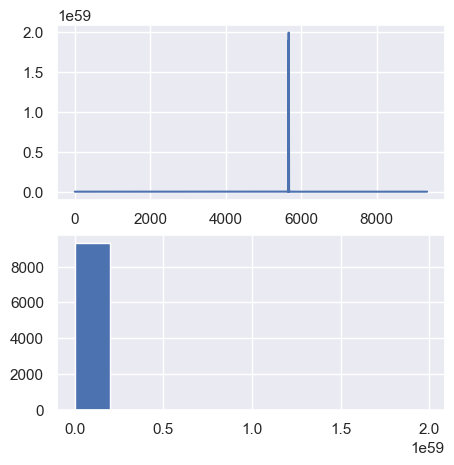

In [74]:
#Exponential transform

dataframe_exp = DataFrame(df3.values)
dataframe_exp.columns = ['Price']
dataframe_exp['Price'] = exp(dataframe_exp['Price'])

# line plot
plt.subplot(211)
plt.plot(dataframe_exp['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_exp['Price'])
plt.show() 

In [75]:
x_exp = dataframe_exp.values
result = adfuller(x_exp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.630666
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


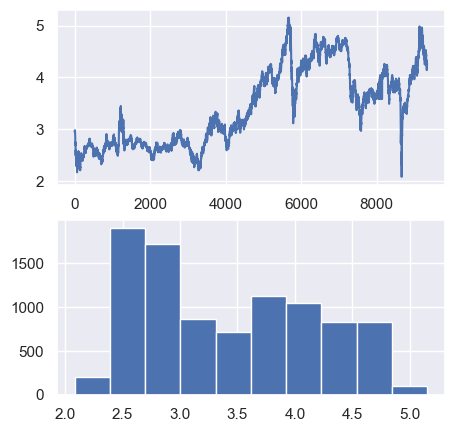

In [76]:
# Cube root transform

dataframe_cbrt = DataFrame(df3.values)
dataframe_cbrt.columns = ['Price']
dataframe_cbrt['Price'] = cbrt(dataframe_cbrt['Price']) 

# line plot
plt.subplot(211)
plt.plot(dataframe_cbrt['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_cbrt['Price'])
plt.show()

In [77]:
x_cbrt = dataframe_cbrt.values
result = adfuller(x_cbrt)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.043514
p-value: 0.267825
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


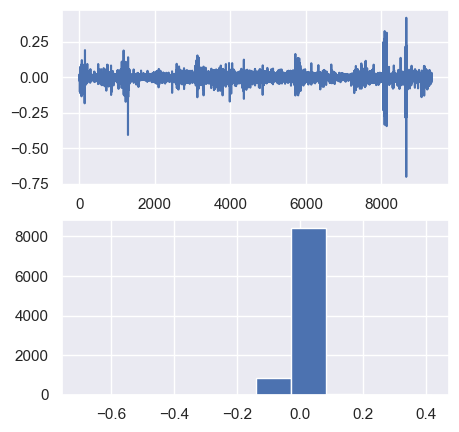

In [78]:
# Log differencing transform

dataframe_log_diff = DataFrame(df3.values)
dataframe_log_diff.columns = ['Price']
dataframe_log_diff['Price'] = log(dataframe_log_diff['Price']) - log(dataframe_log_diff['Price']).shift(1) 

# line plot
plt.subplot(211)
plt.plot(dataframe_log_diff['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_log_diff['Price'])
plt.show() 

In [79]:
#x_log_diff = dataframe_log_diff.values
#result = adfuller(x_log_diff)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
# print('\t%s: %.3f' % (key, value))

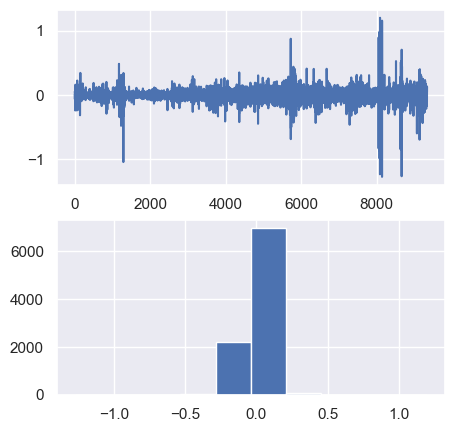

In [80]:
# Square root differencing transform

dataframe_sqrt_diff = DataFrame(df3.values)
dataframe_sqrt_diff.columns = ['Price']
dataframe_sqrt_diff['Price'] = sqrt(dataframe_sqrt_diff['Price']) - sqrt(dataframe_sqrt_diff['Price']).shift(1)  

# line plot
plt.subplot(211)
plt.plot(dataframe_sqrt_diff['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_sqrt_diff['Price'])
plt.show() 

In [81]:
x_sqrt_diff = dataframe_sqrt_diff.values
x_sqrt_diff

array([[       nan],
       [0.04332965],
       [0.05170859],
       ...,
       [0.05205206],
       [0.05174146],
       [0.12520544]])

In [82]:
np.any(~np.isfinite(x_sqrt_diff),axis=0)

array([ True])

In [83]:
x_sqrt_diff

array([[       nan],
       [0.04332965],
       [0.05170859],
       ...,
       [0.05205206],
       [0.05174146],
       [0.12520544]])

In [84]:
#result = adfuller(x_sqrt_diff)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
# print('\t%s: %.3f' % (key, value))

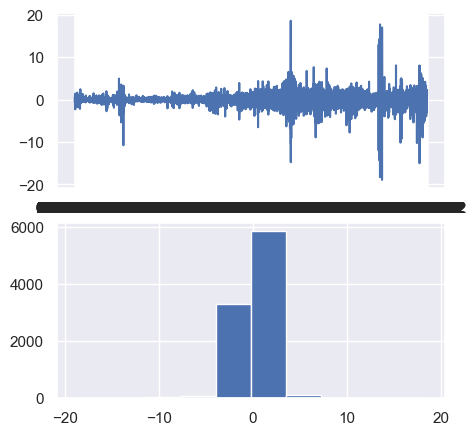

In [85]:
# First order differencing

dataframe_first_diff = df3.diff()[1:]
dataframe_first_diff

# line plot
plt.subplot(211)
plt.plot(dataframe_first_diff['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_first_diff['Price'])
plt.show() 

In [86]:
x_first_diff = dataframe_first_diff.values
result = adfuller(x_first_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.864850
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [87]:
dataframe_first_diff.head()

Price
Date             
03-01-1986   0.44
06-01-1986   0.53
07-01-1986  -0.68
08-01-1986   0.02
09-01-1986   0.16

## ACF and PACF plots

### ACf and PACF plots before applying transformations

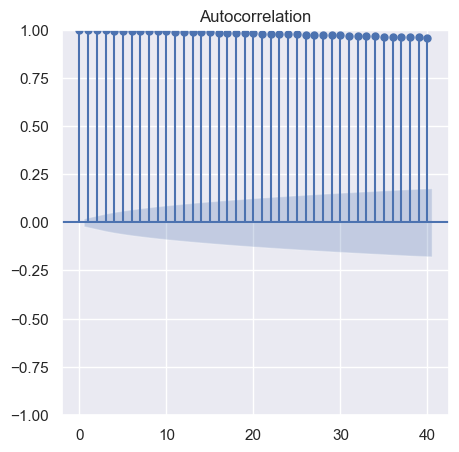

In [88]:
plot_acf(df3['Price'])
plt.show()

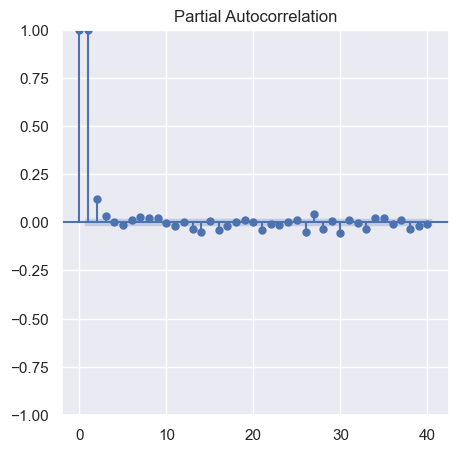

In [89]:
plot_pacf(df3['Price'])
plt.show()

### ACF and PACF plots after applying transformations

##### Linear Transform 

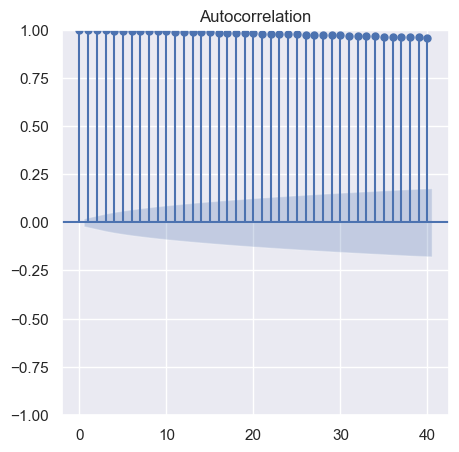

In [90]:
plot_acf(dataframe_linear['Price'])
plt.show()

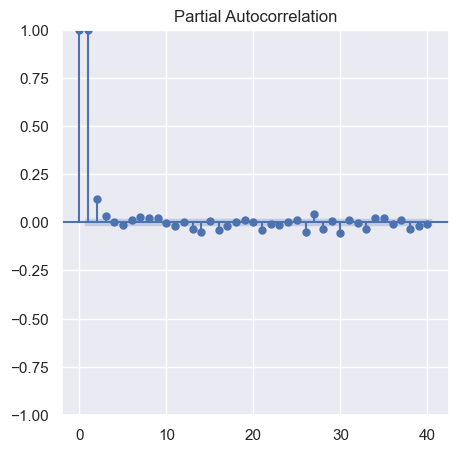

In [91]:
plot_pacf(dataframe_linear['Price'])
plt.show()

##### Square Root Transform

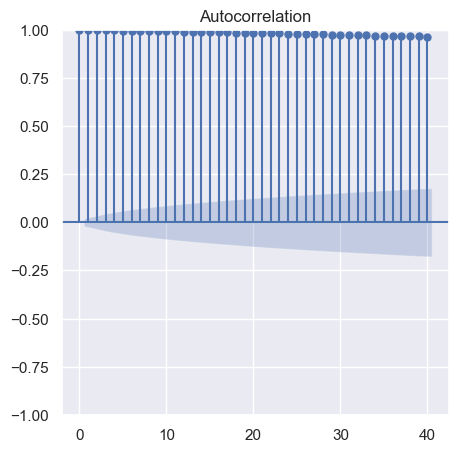

In [92]:
plot_acf(dataframe_sqrt['Price'])
plt.show()

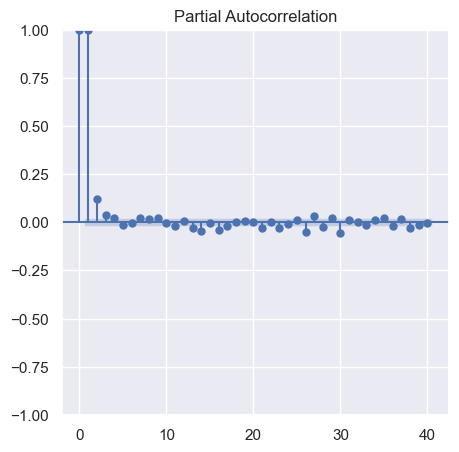

In [93]:
plot_pacf(dataframe_sqrt['Price'])
plt.show()

##### Log Transform 

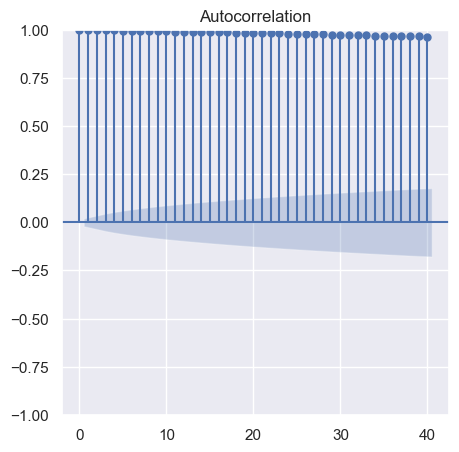

In [94]:
plot_acf(dataframe_log['Price'])
plt.show()

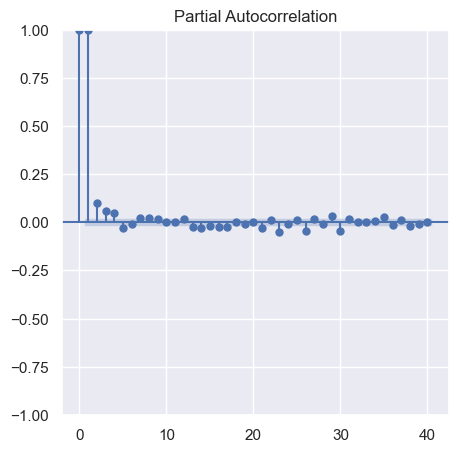

In [95]:
plot_pacf(dataframe_log['Price'])
plt.show()

##### Exponential Transform

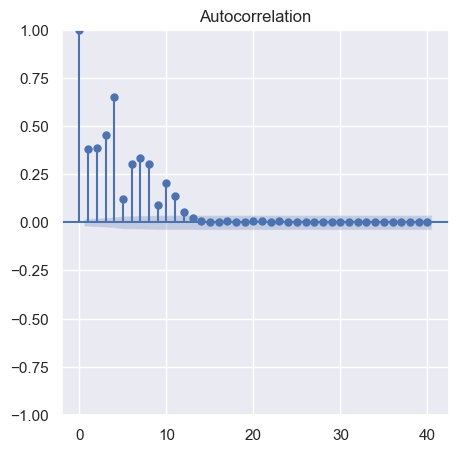

In [96]:
plot_acf(dataframe_exp['Price'])
plt.show()

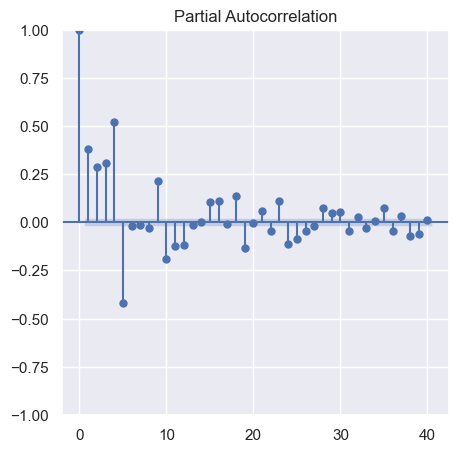

In [97]:
plot_pacf(dataframe_exp['Price'])
plt.show()

##### Cube root transform

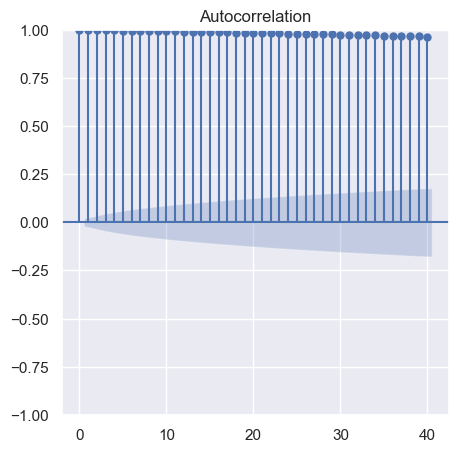

In [98]:
plot_acf(dataframe_cbrt['Price'])
plt.show()

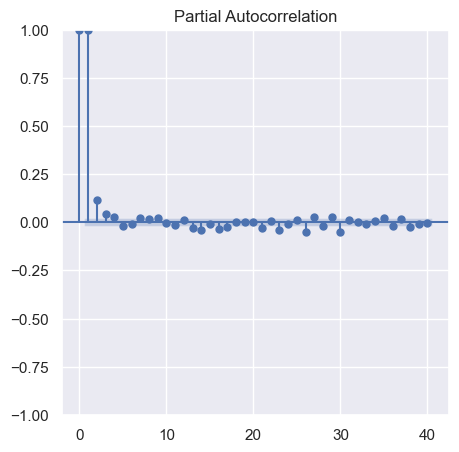

In [99]:
plot_pacf(dataframe_cbrt['Price'])
plt.show()

##### log differencing transform

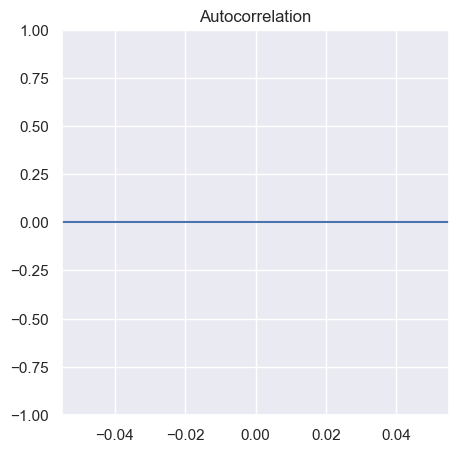

In [100]:
plot_acf(dataframe_log_diff['Price'])
plt.show()

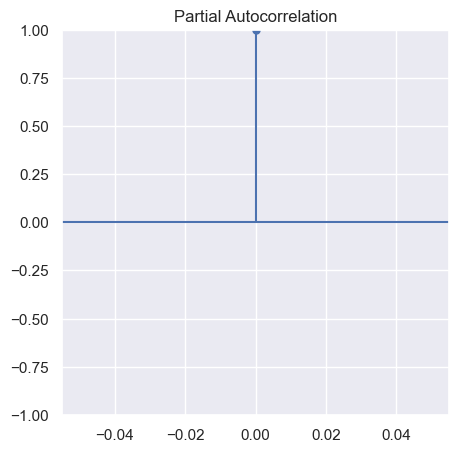

In [101]:
plot_pacf(dataframe_log_diff['Price'])
plt.show()

##### Square Root differencing transform

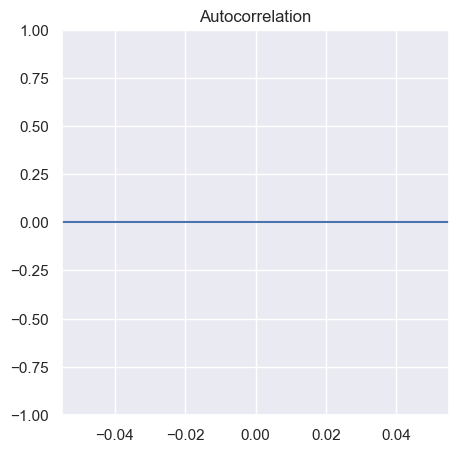

In [102]:
plot_acf(dataframe_sqrt_diff['Price'])
plt.show()

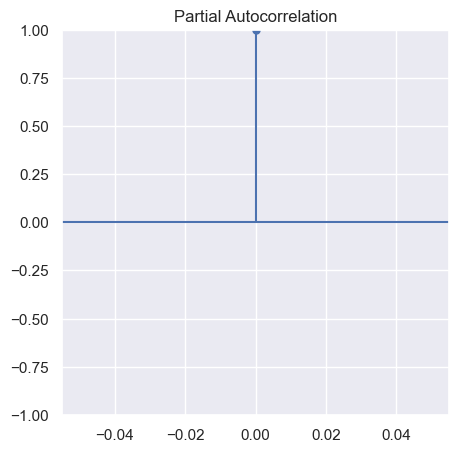

In [103]:
plot_pacf(dataframe_sqrt_diff['Price'])
plt.show()

#####  First order differencing

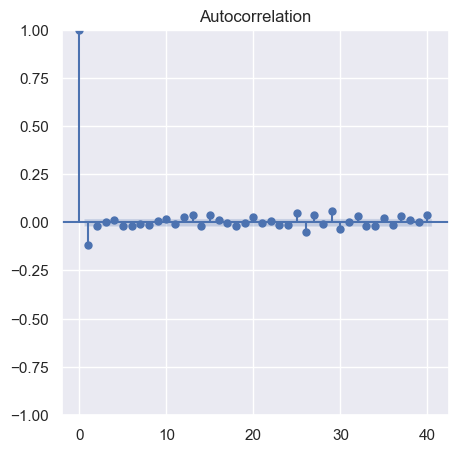

In [104]:
plot_acf(dataframe_first_diff['Price'])
plt.show()

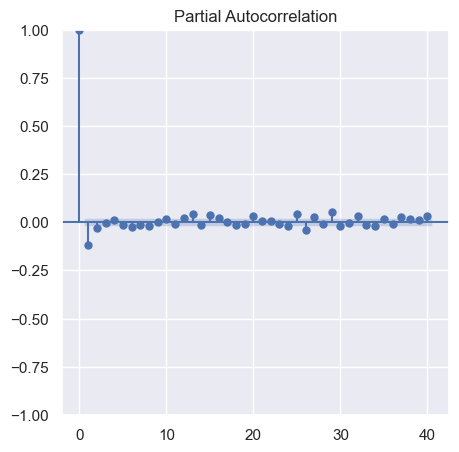

In [105]:
plot_pacf(dataframe_first_diff['Price'])
plt.show()

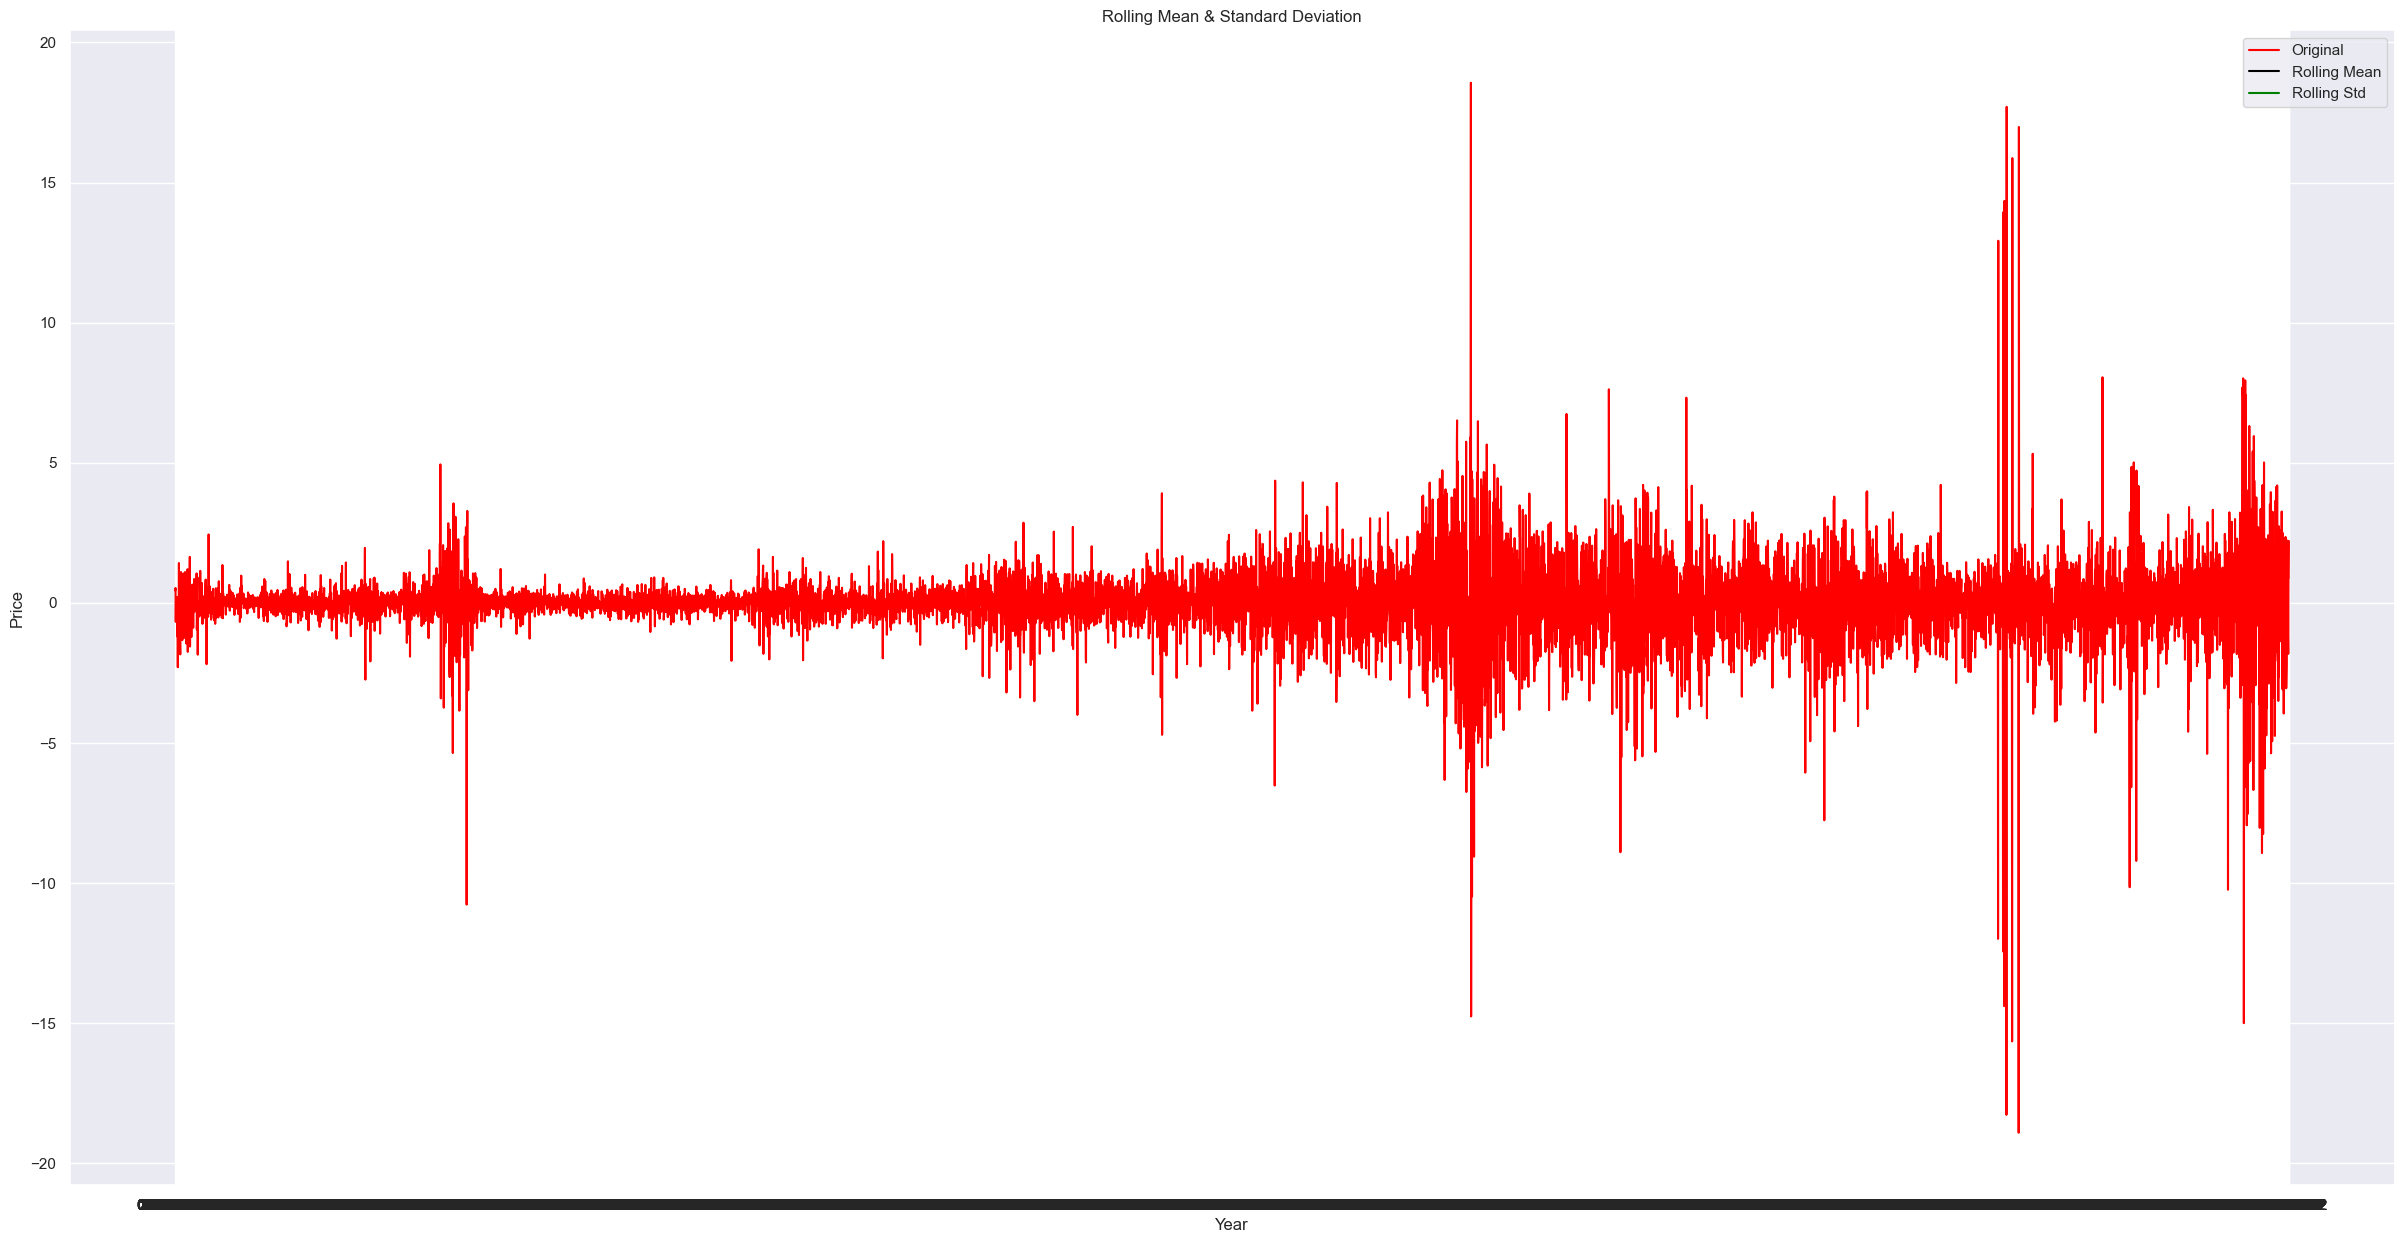

Test statistic: -13.864850158434608
p-value: 6.626515507288409e-26
Critical Values: {'1%': -3.431053874661101, '5%': -2.861851068123899, '10%': -2.566935576484507}


In [106]:
#Nul hypothesis = non-stationary; Alternate hypothesis = Stationary
#if p-value > 0.05 - accept null hypothesis(data is non stationary) else accept alternate hypothesis(data is stationary)
def check_adfuller(dataframe_first_diff):
    result = adfuller(dataframe_first_diff,autolag='AIC')
    print('Test statistic:',result[0])
    print('p-value:',result[1])
    print('Critical Values:',result[4])
def check_mean_std(dataframe_first_diff):
    dataframe_first_diff_log = np.log(dataframe_first_diff)
    moving_avg1 = dataframe_first_diff_log.rolling(12).mean()
    moving_std1 = dataframe_first_diff_log.rolling(12).std()
    plt.figure(figsize=(30,15))
    orig = plt.plot(dataframe_first_diff, color = 'red',label = 'Original')
    mean = plt.plot(moving_avg1, color = 'black',label= 'Rolling Mean')
    std = plt.plot(moving_std1, color = 'green',label= 'Rolling Std')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
check_mean_std(dataframe_first_diff)
check_adfuller(dataframe_first_diff.Price)

Here, the p value is less than 0.05 (Critical value). So, Accept Alternate hypothesis i.e., The data is stationary.

In [107]:
df3.head()

Price
Date             
02-01-1986  25.56
03-01-1986  26.00
06-01-1986  26.53
07-01-1986  25.85
08-01-1986  25.87

In [108]:
df5 = dataframe_first_diff.copy()
df5

Price
Date             
03-01-1986   0.44
06-01-1986   0.53
07-01-1986  -0.68
08-01-1986   0.02
09-01-1986   0.16
...           ...
15-12-2022  -1.17
16-12-2022  -1.82
19-12-2022   0.90
20-12-2022   0.90
21-12-2022   2.20

[9331 rows x 1 columns]

In [109]:
df4.head()

Date  Price Month  Year
0 1986-02-01  25.56   Feb  1986
1 1986-03-01  26.00   Mar  1986
2 1986-06-01  26.53   Jun  1986
3 1986-07-01  25.85   Jul  1986
4 1986-08-01  25.87   Aug  1986

In [110]:
df6 = df4.copy()
df6.head()

Date  Price Month  Year
0 1986-02-01  25.56   Feb  1986
1 1986-03-01  26.00   Mar  1986
2 1986-06-01  26.53   Jun  1986
3 1986-07-01  25.85   Jul  1986
4 1986-08-01  25.87   Aug  1986

In [111]:
X = pd.DataFrame({"t":range(1,9333)})
X.head()

t
0  1
1  2
2  3
3  4
4  5

In [112]:
X['t_square'] = X['t']**2
X.head()

t  t_square
0  1         1
1  2         4
2  3         9
3  4        16
4  5        25

In [113]:
df7=df6.drop('Year', axis=1)
df7.head()

Date  Price Month
0 1986-02-01  25.56   Feb
1 1986-03-01  26.00   Mar
2 1986-06-01  26.53   Jun
3 1986-07-01  25.85   Jul
4 1986-08-01  25.87   Aug

In [114]:
df7['log_Price'] = np.log(df7['Price'])
df7.head()

Date  Price Month  log_Price
0 1986-02-01  25.56   Feb   3.241029
1 1986-03-01  26.00   Mar   3.258097
2 1986-06-01  26.53   Jun   3.278276
3 1986-07-01  25.85   Jul   3.252311
4 1986-08-01  25.87   Aug   3.253084

In [115]:
df8 = pd.get_dummies(df7, columns=['Month'])
df8.head()

Date  Price  log_Price  Month_Apr  Month_Aug  Month_Dec  Month_Feb  \
0 1986-02-01  25.56   3.241029          0          0          0          1   
1 1986-03-01  26.00   3.258097          0          0          0          0   
2 1986-06-01  26.53   3.278276          0          0          0          0   
3 1986-07-01  25.85   3.252311          0          0          0          0   
4 1986-08-01  25.87   3.253084          0          1          0          0   

   Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  \
0          0          0          0          0          0          0   
1          0          0          0          1          0          0   
2          0          0          1          0          0          0   
3          0          1          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Oct  Month_Sep  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [116]:
df9 = pd.concat([df8, X], axis=1)
df9.head()

Date  Price  log_Price  Month_Apr  Month_Aug  Month_Dec  Month_Feb  \
0 1986-02-01  25.56   3.241029          0          0          0          1   
1 1986-03-01  26.00   3.258097          0          0          0          0   
2 1986-06-01  26.53   3.278276          0          0          0          0   
3 1986-07-01  25.85   3.252311          0          0          0          0   
4 1986-08-01  25.87   3.253084          0          1          0          0   

   Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  \
0          0          0          0          0          0          0   
1          0          0          0          1          0          0   
2          0          0          1          0          0          0   
3          0          1          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Oct  Month_Sep  t  t_square  
0          0          0  1         1  
1          0          0  2         4  
2          0          0  3         9  
3          0          0  4        16  
4          0          0  5        25

# Partitioning the data

In [117]:
Train = df9.head(6160) #66%
Test = df9.tail(3172) #33%

In [118]:
Train.head()

Date  Price  log_Price  Month_Apr  Month_Aug  Month_Dec  Month_Feb  \
0 1986-02-01  25.56   3.241029          0          0          0          1   
1 1986-03-01  26.00   3.258097          0          0          0          0   
2 1986-06-01  26.53   3.278276          0          0          0          0   
3 1986-07-01  25.85   3.252311          0          0          0          0   
4 1986-08-01  25.87   3.253084          0          1          0          0   

   Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  \
0          0          0          0          0          0          0   
1          0          0          0          1          0          0   
2          0          0          1          0          0          0   
3          0          1          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Oct  Month_Sep  t  t_square  
0          0          0  1         1  
1          0          0  2         4  
2          0          0  3         9  
3          0          0  4        16  
4          0          0  5        25

In [119]:
Test.head()

Date  Price  log_Price  Month_Apr  Month_Aug  Month_Dec  Month_Feb  \
6160 2010-06-22  77.15   4.345752          0          0          0          0   
6161 2010-06-23  75.90   4.329417          0          0          0          0   
6162 2010-06-24  75.96   4.330207          0          0          0          0   
6163 2010-06-25  78.45   4.362461          0          0          0          0   
6164 2010-06-28  78.26   4.360037          0          0          0          0   

      Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  Month_Nov  \
6160          0          0          1          0          0          0   
6161          0          0          1          0          0          0   
6162          0          0          1          0          0          0   
6163          0          0          1          0          0          0   
6164          0          0          1          0          0          0   

      Month_Oct  Month_Sep     t  t_square  
6160          0          0  6161  37957921  
6161          0          0  6162  37970244  
6162          0          0  6163  37982569  
6163          0          0  6164  37994896  
6164          0          0  6165  38007225

In [120]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Model Building

## Model Based Method



### Linear

In [121]:
linear_model = smf.ols('Price~t',data=Train).fit()
pred_linear_model = pd.Series(linear_model.predict(pd.DataFrame(Test)))
pred_linear_model 

6160    63.522996
6161    63.532889
6162    63.542783
6163    63.552677
6164    63.562570
          ...    
9327    94.855951
9328    94.865845
9329    94.875739
9330    94.885632
9331    94.895526
Length: 3172, dtype: float64

In [122]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     8182.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:09:11   Log-Likelihood:                -25529.
No. Observations:                6160   AIC:                         5.106e+04
Df Residuals:                    6158   BIC:                         5.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5687      0.389      6.603      0.000       1.806       3.331
t              0.0099      0.000     90.457      0.000       0.010       0.010
==============================================================================
Omnibus:                     1695.023   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5775.264
Skew:                           1.369   Prob(JB):                         0.00
Kurtosis:                       6.873   Cond. No.                     7.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
MAPE_linear=MAPE(pred_linear_model,Test.Price) 
MAPE_linear 

48.066785334303006

In [124]:
rmse_linear_model= np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear_model))**2)) 
rmse_linear_model 

29.18313959712434

### Exponential

In [125]:
exp_model = smf.ols('log_Price~t',data=Train).fit()
pred_exp_model = pd.Series(exp_model.predict(pd.DataFrame(Test)))
pred_exp_model 

6160    4.112684
6161    4.112943
6162    4.113201
6163    4.113460
6164    4.113719
          ...   
9327    4.932324
9328    4.932582
9329    4.932841
9330    4.933100
9331    4.933359
Length: 3172, dtype: float64

In [126]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:09:14   Log-Likelihood:                -1847.0
No. Observations:                6160   AIC:                             3698.
Df Residuals:                    6158   BIC:                             3711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5182      0.008    302.513      0.000       2.502       2.534
t              0.0003   2.34e-06    110.587      0.000       0.000       0.000
==============================================================================
Omnibus:                       15.574   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.710
Skew:                          -0.088   Prob(JB):                     0.000235
Kurtosis:                       3.185   Cond. No.                     7.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
MAPE_exp = MAPE(pred_exp_model, Test.Price)
MAPE_exp

92.69898002609854

In [128]:
rmse_exp_model = np.sqrt(np.mean((np.array(Test['Price']))**2))
rmse_exp_model

74.50066001488985

### Quadratic

In [129]:
quad_model = smf.ols('Price~t+t_square',data=Train).fit()
pred_quad_model = pd.Series(quad_model.predict(Test))
pred_quad_model 

6160     86.880845
6161     86.913486
6162     86.946134
6163     86.978790
6164     87.011453
           ...    
9327    227.269357
9328    227.325381
9329    227.381411
9330    227.437450
9331    227.493495
Length: 3172, dtype: float64

In [130]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.040e+04
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:09:16   Log-Likelihood:                -23585.
No. Observations:                6160   AIC:                         4.718e+04
Df Residuals:                    6157   BIC:                         4.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9265      0.426     60.895      0.000      25.092      26.761
t             -0.0129      0.000    -40.260      0.000      -0.013      -0.012
t_square    3.692e-06   5.02e-08     73.593      0.000    3.59e-06    3.79e-06
==============================================================================
Omnibus:                     2087.618   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16541.656
Skew:                           1.401   Prob(JB):                         0.00
Kurtosis:                      10.523   Cond. No.                     5.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
MAPE_quad = MAPE(pred_quad_model, Test.Price)
MAPE_quad

150.72951696947075

In [132]:
rmse_quad_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_quad_model)))**2))
rmse_quad_model

3.435598054094539e+97

# ARIMA Model

In [133]:
Train1 = df5.head(6160) #66.6%
Test1 = df5.tail(3171) #33.3% 

In [134]:
Train1.head()

Price
Date             
03-01-1986   0.44
06-01-1986   0.53
07-01-1986  -0.68
08-01-1986   0.02
09-01-1986   0.16

In [135]:
Test1.head()

Price
Date             
23-06-2010  -1.25
24-06-2010   0.06
25-06-2010   2.49
28-06-2010  -0.19
29-06-2010  -2.33

In [136]:
stepwise_fit = auto_arima(df5['Price'], trace=True,
suppress_warnings=True) 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=32191.253, Time=4.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32321.990, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=32193.798, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=32187.390, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32320.150, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=32187.347, Time=2.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=32188.859, Time=1.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=32189.033, Time=6.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=32187.144, Time=1.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=32188.899, Time=1.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=32191.143, Time=1.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=32185.357, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32185.597, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=32187.246, Time=1.86 sec
 ARIMA(0,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9331
Model:               SARIMAX(0, 0, 2)   Log Likelihood              -16089.679
Date:                Wed, 22 Feb 2023   AIC                          32185.357
Time:                        16:09:47   BIC                          32206.781
Sample:                             0   HQIC                         32192.634
                               - 9331                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1213      0.003    -40.770      0.000      -0.127      -0.115
ma.L2         -0.0155      0.006     -2.703      0.007      -0.027      -0.004
sigma2         1.8418      0.007    257.533      0.000       1.828       1.856
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            356642.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.12   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
arima_model=ARIMA(Train1['Price'],order=(0,0,2))
arima_model=arima_model.fit()
arima_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 6160
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -8970.539
Date:                Wed, 22 Feb 2023   AIC                          17949.078
Time:                        16:09:48   BIC                          17975.981
Sample:                             0   HQIC                         17958.408
                               - 6160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.012      0.682      0.495      -0.016       0.032
ma.L1         -0.0604      0.003    -17.364      0.000      -0.067      -0.054
ma.L2         -0.0247      0.006     -4.114      0.000      -0.037      -0.013
sigma2         1.0775      0.005    227.429      0.000       1.068       1.087
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            278263.74
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               6.98   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
start = len(Train1)
end = len(Train1) + len(Test1) - 1

In [139]:
start

6160

In [140]:
end

9330

In [141]:
pred_arima_model = arima_model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred_arima_model 

6160    0.031537
6161    0.024473
6162    0.008368
6163    0.008368
6164    0.008368
          ...   
9326    0.008368
9327    0.008368
9328    0.008368
9329    0.008368
9330    0.008368
Name: ARIMA Predictions, Length: 3171, dtype: float64

<AxesSubplot: xlabel='Date'>

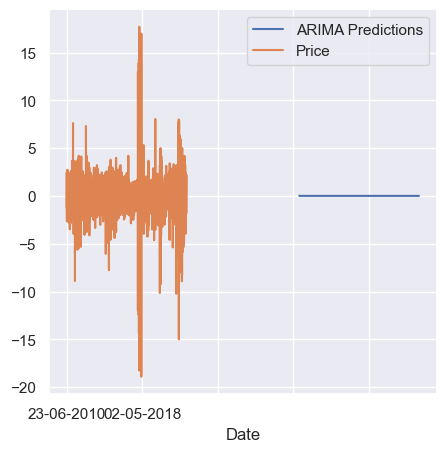

In [142]:
pred_arima_model.plot(legend=True)
Test1['Price'].plot(legend=True) 

In [143]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [144]:
rmse_arima_model=sqrt(mean_squared_error(pred_arima_model,Test1['Price']))
print(rmse_arima_model)  

1.8434692984607286


# FB Prophet Model

In [145]:
#!pip install prophet

In [146]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet 

In [147]:
df10 = df3.reset_index()
df10.head()

Date  Price
0  02-01-1986  25.56
1  03-01-1986  26.00
2  06-01-1986  26.53
3  07-01-1986  25.85
4  08-01-1986  25.87

In [148]:
df11 = df10.copy()
df11.head()

Date  Price
0  02-01-1986  25.56
1  03-01-1986  26.00
2  06-01-1986  26.53
3  07-01-1986  25.85
4  08-01-1986  25.87

In [149]:
df11.columns = ['ds', 'y']
df11.head()

ds      y
0  02-01-1986  25.56
1  03-01-1986  26.00
2  06-01-1986  26.53
3  07-01-1986  25.85
4  08-01-1986  25.87

In [150]:
df11.dtypes

ds     object
y     float64
dtype: object

In [151]:
df11['ds'] = pd.to_datetime(df11['ds'])
df11.head()

ds      y
0 1986-02-01  25.56
1 1986-03-01  26.00
2 1986-06-01  26.53
3 1986-07-01  25.85
4 1986-08-01  25.87

In [152]:
df11.dtypes

ds    datetime64[ns]
y            float64
dtype: object

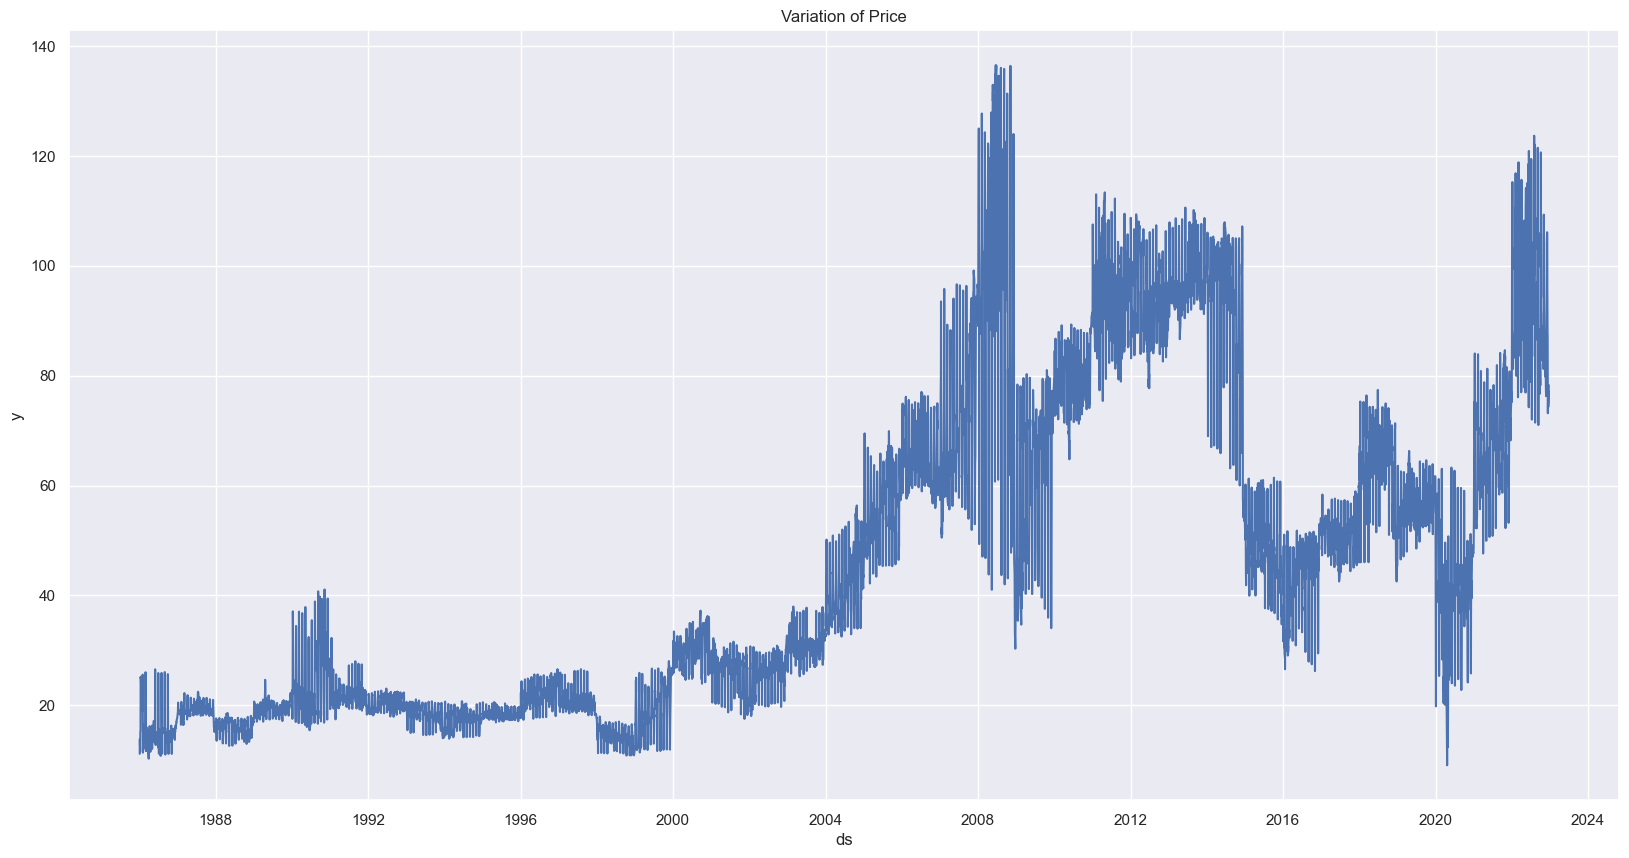

In [153]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df11['ds'],y=df11['y'],data=df11)
plt.title('Variation of Price')
plt.show()

In [154]:
#Data Partition
Train2 = df11.iloc[:len(df11)-150] # Total data except last 150 observations
Test2 = df11.iloc[len(df11)-150:] # Only last 150 observations

In [155]:
prophet_model = Prophet()
prophet_model.fit(Train2)
future = prophet_model.make_future_dataframe(periods=391) 
forecast_prophet = prophet_model.predict(future)

16:10:05 - cmdstanpy - INFO - Chain [1] start processing
16:10:21 - cmdstanpy - INFO - Chain [1] done processing


In [156]:
forecast_prophet

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1986-01-04  14.971748    1.505733   27.406764    14.971748    14.971748   
1    1986-01-05  14.975790    1.048638   27.140488    14.975790    14.975790   
2    1986-01-07  14.983873    1.611260   27.301021    14.983873    14.983873   
3    1986-01-08  14.987915    1.444092   26.042790    14.987915    14.987915   
4    1986-01-10  14.995999    1.118059   26.987896    14.995999    14.995999   
...         ...        ...         ...         ...          ...          ...   
9568 2023-12-27  69.324773   52.616002   81.393047    65.078466    73.058379   
9569 2023-12-28  69.331143   53.258839   81.341688    65.065062    73.098453   
9570 2023-12-29  69.337513   53.772549   81.327390    65.054674    73.138528   
9571 2023-12-30  69.343884   54.517256   82.554624    65.046210    73.178602   
9572 2023-12-31  69.350254   53.982785   82.188664    65.045560    73.199994   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          -0.178918             -0.178918             -0.178918  0.607648   
1          -1.053455             -1.053455             -1.053455 -0.339391   
2          -0.691917             -0.691917             -0.691917 -0.095856   
3          -0.766307             -0.766307             -0.766307 -0.214363   
4          -0.689596             -0.689596             -0.689596 -0.194426   
...              ...                   ...                   ...       ...   
9568       -1.788257             -1.788257             -1.788257 -0.214363   
9569       -1.335970             -1.335970             -1.335970  0.145579   
9570       -1.580097             -1.580097             -1.580097 -0.194426   
9571       -0.680195             -0.680195             -0.680195  0.607648   
9572       -1.529084             -1.529084             -1.529084 -0.339391   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.607648      0.607648 -0.786566     -0.786566     -0.786566   
1        -0.339391     -0.339391 -0.714064     -0.714064     -0.714064   
2        -0.095856     -0.095856 -0.596061     -0.596061     -0.596061   
3        -0.214363     -0.214363 -0.551944     -0.551944     -0.551944   
4        -0.194426     -0.194426 -0.495171     -0.495171     -0.495171   
...            ...           ...       ...           ...           ...   
9568     -0.214363     -0.214363 -1.573894     -1.573894     -1.573894   
9569      0.145579      0.145579 -1.481549     -1.481549     -1.481549   
9570     -0.194426     -0.194426 -1.385671     -1.385671     -1.385671   
9571      0.607648      0.607648 -1.287844     -1.287844     -1.287844   
9572     -0.339391     -0.339391 -1.189693     -1.189693     -1.189693   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
9568                   0.0                         0.0   
9569                   0.0                         0.0   
9570                   0.0                         0.0   
9571                   0.0                         0.0   
9572                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0  14.792830  
1                            0.0  13.922335  
2                            0.0  14.291957  
3                            0.0  14.221608  
4                            0.0  14.306403  
...                          ...        ...  
9568                         0.0  67.536515  
9569                         0.0  67.995173  
9570                         0.0  67.757417  
9571                         0.0  68.663688  
9572                   

In [157]:
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] 

ds       yhat  yhat_lower  yhat_upper
0    1986-01-04  14.792830    1.505733   27.406764
1    1986-01-05  13.922335    1.048638   27.140488
2    1986-01-07  14.291957    1.611260   27.301021
3    1986-01-08  14.221608    1.444092   26.042790
4    1986-01-10  14.306403    1.118059   26.987896
...         ...        ...         ...         ...
9568 2023-12-27  67.536515   52.616002   81.393047
9569 2023-12-28  67.995173   53.258839   81.341688
9570 2023-12-29  67.757417   53.772549   81.327390
9571 2023-12-30  68.663688   54.517256   82.554624
9572 2023-12-31  67.821170   53.982785   82.188664

[9573 rows x 4 columns]

In [158]:
Fcast = forecast_prophet.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(Train2.set_index('ds')) 
Fcast.head() 

yhat  yhat_lower  yhat_upper      y
ds                                                  
1986-01-04  14.792830    1.505733   27.406764  11.13
1986-01-05  13.922335    1.048638   27.140488  13.80
1986-01-07  14.291957    1.611260   27.301021  12.39
1986-01-08  14.221608    1.444092   26.042790  11.56
1986-01-10  14.306403    1.118059   26.987896  15.23

In [159]:
Test2.head()

ds       y
9182 2022-05-19  112.21
9183 2022-05-20  113.23
9184 2022-05-23  110.29
9185 2022-05-24  109.77
9186 2022-05-25  110.33

#### FB Prophet Visualisation

In [160]:
pred_prophet = forecast_prophet.iloc[-391:]['yhat'] 
pred_prophet 

9182    65.150761
9183    64.983650
9184    65.294540
9185    64.906186
9186    65.661835
          ...    
9568    67.536515
9569    67.995173
9570    67.757417
9571    68.663688
9572    67.821170
Name: yhat, Length: 391, dtype: float64

In [161]:
from  sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from statsmodels.tools.eval_measures import rmse 

In [162]:
## Calculate MAE,MSE,R-Squared between expected and predicted values  
y_true = Train2['y'].iloc[:9182] 
y_pred = Fcast['yhat'].iloc[:9182] 
mae = mean_absolute_error(y_true,y_pred)
mse = mean_squared_error(y_true,y_pred)
rmse = sqrt(mean_squared_error(y_true,y_pred))
print('rmse: %.2f' % rmse)
print('MAE: %.2f' % mae)
print('MSE: %.2f' % mse)
r = r2_score(y_true,y_pred)
print('R-squared Score: %.2f'% r) 

rmse: 9.82
MAE: 6.15
MSE: 96.44
R-squared Score: 0.88


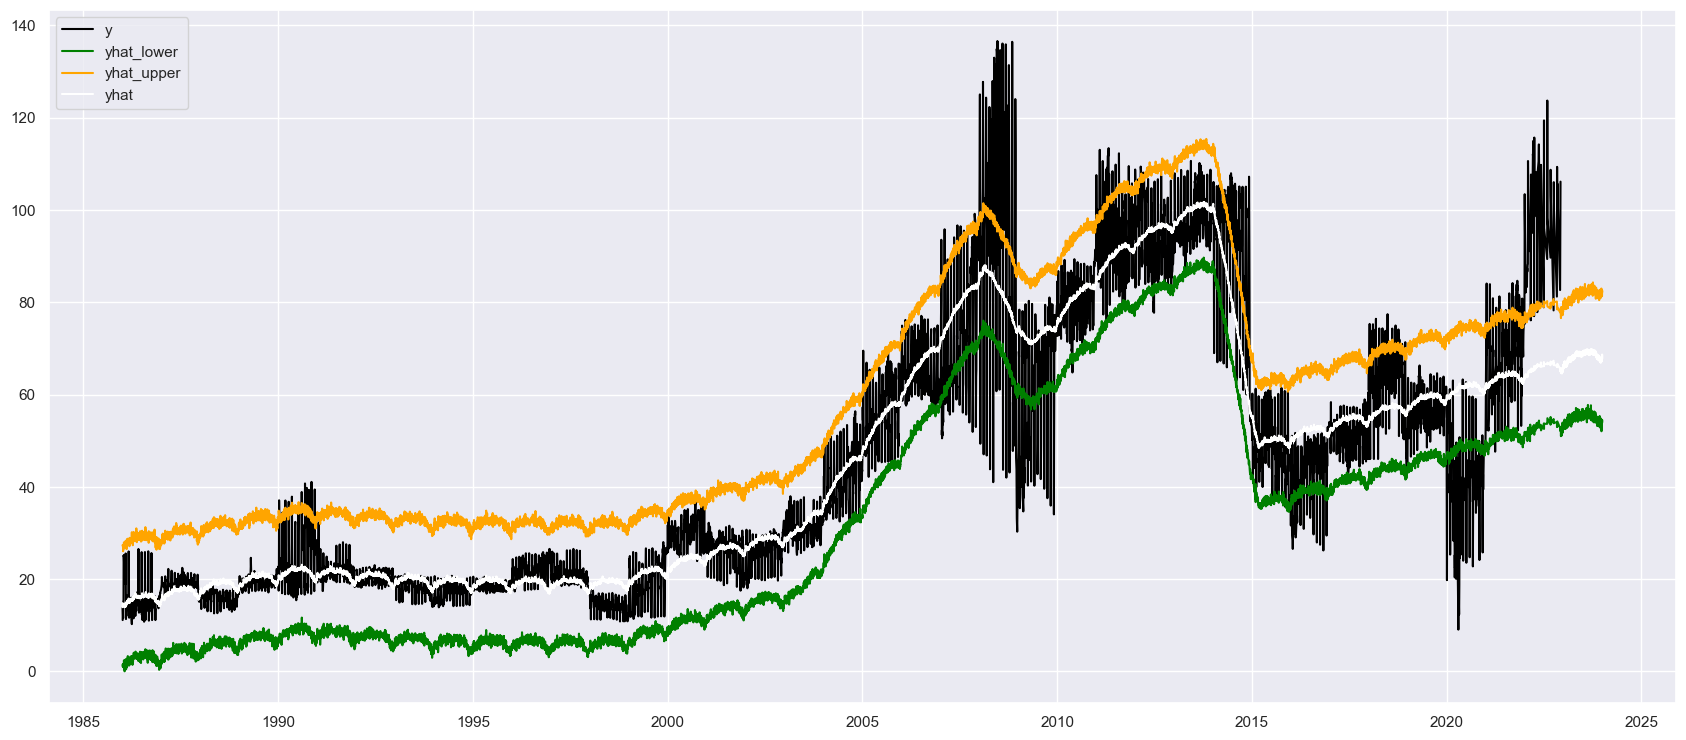

In [163]:
plt.figure(figsize=(21,9))
label=['y','yhat_lower','yhat_upper','yhat']
plt.plot(Fcast['y'],color='black')
plt.plot(Fcast['yhat_lower'],color='Green')
plt.plot(Fcast['yhat_upper'],color='Orange') 
plt.plot(Fcast['yhat'],color='White') 
plt.legend(label)
plt.show() 

In [164]:
#prophet_model.summary()

# Naive Model( Lst Simple Method)

In [165]:
Train3 = df10.head(6160)
Test3 = df10.tail(3172) 

In [166]:
y_hat=Test3.copy()
y_hat.head() 

Date  Price
6160  22-06-2010  77.15
6161  23-06-2010  75.90
6162  24-06-2010  75.96
6163  25-06-2010  78.45
6164  28-06-2010  78.26

In [167]:
df3=np.asarray(Train3.Price)
df3

array([25.56, 26.  , 26.53, ..., 76.82, 77.18, 77.84])

In [168]:
y_hat['naive']=df3[len(df3)-1]
y_hat.head() 

Date  Price  naive
6160  22-06-2010  77.15  77.84
6161  23-06-2010  75.90  77.84
6162  24-06-2010  75.96  77.84
6163  25-06-2010  78.45  77.84
6164  28-06-2010  78.26  77.84

In [169]:
rmse_naive_model = np.sqrt(np.mean((np.array(Test3['Price'])-np.array(np.exp(y_hat['naive'])))**2))
rmse_naive_model 

6.389729471063823e+33

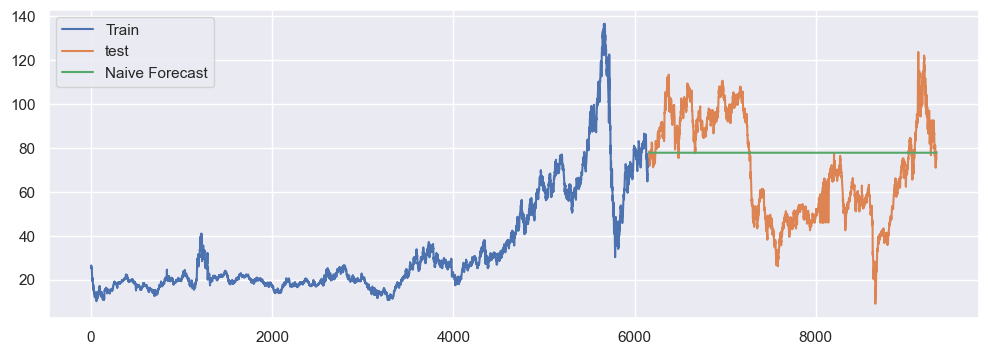

In [170]:
plt.figure(figsize=(12,4))
plt.plot(Train3['Price'], label='Train')
plt.plot(Test3['Price'], label='test')
plt.plot(y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

# Simple Averages Method

In [171]:
y_hat_avg=Test3.copy()
y_hat_avg.head() 

Date  Price
6160  22-06-2010  77.15
6161  23-06-2010  75.90
6162  24-06-2010  75.96
6163  25-06-2010  78.45
6164  28-06-2010  78.26

In [172]:
y_hat_avg['avg_forecast']=Train3['Price'].mean()
y_hat_avg.head() 

Date  Price  avg_forecast
6160  22-06-2010  77.15     33.045834
6161  23-06-2010  75.90     33.045834
6162  24-06-2010  75.96     33.045834
6163  25-06-2010  78.45     33.045834
6164  28-06-2010  78.26     33.045834

In [173]:
rmse_simple_model = np.sqrt(np.mean((np.array(Test3['Price'])-np.array(np.exp(y_hat_avg['avg_forecast'])))**2))
rmse_simple_model 

224710588217780.16

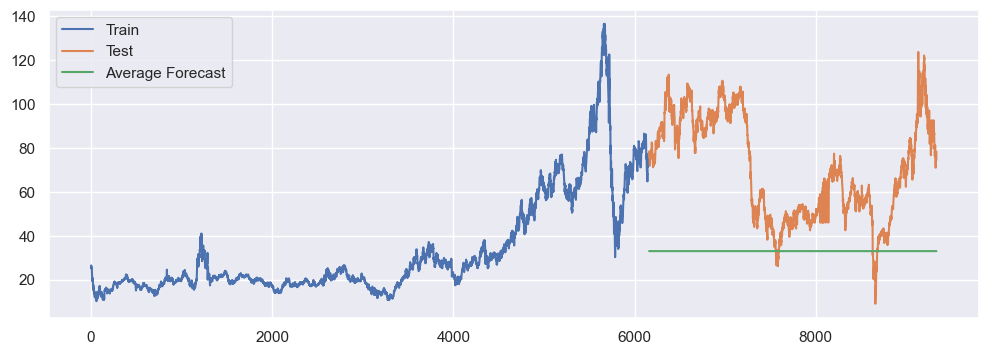

In [174]:
plt.figure(figsize=(12,4))
plt.plot(Train3['Price'], label='Train')
plt.plot(Test3['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show() 

# Long Short Term Memory (LSTM) Model

In [175]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers 

In [176]:
df2.head()

Price
Date             
02-01-1986  25.56
03-01-1986  26.00
06-01-1986  26.53
07-01-1986  25.85
08-01-1986  25.87

In [177]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df2) 
scaled 

array([[0.12905749],
       [0.13249902],
       [0.13664451],
       ...,
       [0.51724677],
       [0.52428627],
       [0.54149394]])

In [178]:
train_size = int(len(scaled) * 0.66)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))   

train: 6159
test: 3174


In [179]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)  

In [180]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back) 

6159 1
0
X 0 to 1
[0.12905749]
Y 1
0.13249902229174815
1
X 1 to 2
[0.13249902]
Y 2
0.13664450527962457
2
X 2 to 3
[0.13664451]
Y 3
0.13132577238951898
3
X 3 to 4
[0.13132577]
Y 4
0.13148220570981622
4
X 4 to 5
[0.13148221]
Y 5
0.13273367227219401
5
X 5 to 6
[0.13273367]
Y 6
0.1297614391865467
6
X 6 to 7
[0.12976144]
Y 7
0.12530308955807584
7
X 7 to 8
[0.12530309]
Y 8
0.12444270629644115
8
X 8 to 9
[0.12444271]
Y 9
0.126085256159562
9
X 9 to 10
[0.12608526]
Y 10
0.1166992569417286
10
X 10 to 11
[0.11669926]
Y 11
0.11396167383652718
11
X 11 to 12
[0.11396167]
Y 12
0.0959718420023465
12
X 12 to 13
[0.09597184]
Y 13
0.09034024247164647
13
X 13 to 14
[0.09034024]
Y 14
0.08752444270629643
14
X 14 to 15
[0.08752444]
Y 15
0.08502150958154088
15
X 15 to 16
[0.08502151]
Y 16
0.08126710989440751
16
X 16 to 17
[0.08126711]
Y 17
0.09237387563551037
17
X 17 to 18
[0.09237388]
Y 18
0.08126710989440751
18
X 18 to 19
[0.08126711]
Y 19
0.0825185764567853
19
X 19 to 20
[0.08251858]
Y 20
0.082283926476339

2009
X 2009 to 2010
[0.06272976]
Y 2010
0.05952287837309349
2010
X 2010 to 2011
[0.05952288]
Y 2011
0.05858427845131013
2011
X 2011 to 2012
[0.05858428]
Y 2012
0.05952287837309349
2012
X 2012 to 2013
[0.05952288]
Y 2013
0.05733281188893234
2013
X 2013 to 2014
[0.05733281]
Y 2014
0.05217051231912398
2014
X 2014 to 2015
[0.05217051]
Y 2015
0.05060617911615174
2015
X 2015 to 2016
[0.05060618]
Y 2016
0.04880719593273368
2016
X 2016 to 2017
[0.0488072]
Y 2017
0.049276495893625344
2017
X 2017 to 2018
[0.0492765]
Y 2018
0.04998044583496285
2018
X 2018 to 2019
[0.04998045]
Y 2019
0.045913179507235044
2019
X 2019 to 2020
[0.04591318]
Y 2020
0.046695346108721156
2020
X 2020 to 2021
[0.04669535]
Y 2021
0.04309737974188503
2021
X 2021 to 2022
[0.04309738]
Y 2022
0.04278451310129057
2022
X 2022 to 2023
[0.04278451]
Y 2023
0.043410246382479464
2023
X 2023 to 2024
[0.04341025]
Y 2024
0.04372311302307391
2024
X 2024 to 2025
[0.04372311]
Y 2025
0.046773562768869764
2025
X 2025 to 2026
[0.04677356]
Y 20

[0.08807196]
Y 4056
0.08932342588971452
4056
X 4056 to 4057
[0.08932343]
Y 4057
0.08298787641767698
4057
X 4057 to 4058
[0.08298788]
Y 4058
0.07680876026593665
4058
X 4058 to 4059
[0.07680876]
Y 4059
0.07766914352757136
4059
X 4059 to 4060
[0.07766914]
Y 4060
0.07743449354712555
4060
X 4060 to 4061
[0.07743449]
Y 4061
0.07149002737583106
4061
X 4061 to 4062
[0.07149003]
Y 4062
0.07008212749315605
4062
X 4062 to 4063
[0.07008213]
Y 4063
0.07274149393820885
4063
X 4063 to 4064
[0.07274149]
Y 4064
0.07852952678920612
4064
X 4064 to 4065
[0.07852953]
Y 4065
0.08220570981619087
4065
X 4065 to 4066
[0.08220571]
Y 4066
0.08400469299960893
4066
X 4066 to 4067
[0.08400469]
Y 4067
0.08596010950332421
4067
X 4067 to 4068
[0.08596011]
Y 4068
0.08009385999217834
4068
X 4068 to 4069
[0.08009386]
Y 4069
0.07860774344935471
4069
X 4069 to 4070
[0.07860774]
Y 4070
0.08330074305827141
4070
X 4070 to 4071
[0.08330074]
Y 4071
0.0886976926085256
4071
X 4071 to 4072
[0.08869769]
Y 4072
0.08572545952287837
4

[0.41345327]
Y 5747
0.42033633163863904
5747
X 5747 to 5748
[0.42033633]
Y 5748
0.45670707860774346
5748
X 5748 to 5749
[0.45670708]
Y 5749
0.44372311302307393
5749
X 5749 to 5750
[0.44372311]
Y 5750
0.4617911615174031
5750
X 5750 to 5751
[0.46179116]
Y 5751
0.4291748142354322
5751
X 5751 to 5752
[0.42917481]
Y 5752
0.47985921001173243
5752
X 5752 to 5753
[0.47985921]
Y 5753
0.4407508799374266
5753
X 5753 to 5754
[0.44075088]
Y 5754
0.4040672663277278
5754
X 5754 to 5755
[0.40406727]
Y 5755
0.40672663277278065
5755
X 5755 to 5756
[0.40672663]
Y 5756
0.4155651153695737
5756
X 5756 to 5757
[0.41556512]
Y 5757
0.3935862338678139
5757
X 5757 to 5758
[0.39358623]
Y 5758
0.36675791943684005
5758
X 5758 to 5759
[0.36675792]
Y 5759
0.3852170512319124
5759
X 5759 to 5760
[0.38521705]
Y 5760
0.37637856863511926
5760
X 5760 to 5761
[0.37637857]
Y 5761
0.36042236996480254
5761
X 5761 to 5762
[0.36042237]
Y 5762
0.35479077043410245
5762
X 5762 to 5763
[0.35479077]
Y 5763
0.34868987094251075
5763
X 

[0.28017208]
Y 1194
0.27274149393820885
1194
X 1194 to 1195
[0.27274149]
Y 1195
0.2685177942901838
1195
X 1195 to 1196
[0.26851779]
Y 1196
0.2782166601486117
1196
X 1196 to 1197
[0.27821666]
Y 1197
0.2734454438795464
1197
X 1197 to 1198
[0.27344544]
Y 1198
0.28893234258897144
1198
X 1198 to 1199
[0.28893234]
Y 1199
0.29988267500977706
1199
X 1199 to 1200
[0.29988268]
Y 1200
0.2969886585842785
1200
X 1200 to 1201
[0.29698866]
Y 1201
0.3104419241298397
1201
X 1201 to 1202
[0.31044192]
Y 1202
0.3312475557293703
1202
X 1202 to 1203
[0.33124756]
Y 1203
0.31106765741102854
1203
X 1203 to 1204
[0.31106766]
Y 1204
0.30973797418850213
1204
X 1204 to 1205
[0.30973797]
Y 1205
0.30238560813453264
1205
X 1205 to 1206
[0.30238561]
Y 1206
0.3211576065701994
1206
X 1206 to 1207
[0.32115761]
Y 1207
0.31341415721548693
1207
X 1207 to 1208
[0.31341416]
Y 1208
0.33648807195932734
1208
X 1208 to 1209
[0.33648807]
Y 1209
0.35111458740711776
1209
X 1209 to 1210
[0.35111459]
Y 1210
0.323660539694955
1210
X 12

In [181]:
## Reshaping the input data 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape) 

(6157, 1, 1)
(3172, 1, 1)


In [ ]:
batch_size = 1
model_lstm = Sequential()
model_lstm.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)  

Epoch 1/100
6157/6157 - 16s - loss: 0.0086 - 16s/epoch - 3ms/step
Epoch 2/100
6157/6157 - 11s - loss: 2.2113e-04 - 11s/epoch - 2ms/step
Epoch 3/100
6157/6157 - 16s - loss: 1.7502e-04 - 16s/epoch - 3ms/step
Epoch 4/100
6157/6157 - 14s - loss: 1.4220e-04 - 14s/epoch - 2ms/step
Epoch 5/100
6157/6157 - 13s - loss: 1.2513e-04 - 13s/epoch - 2ms/step
Epoch 6/100
6157/6157 - 12s - loss: 1.0924e-04 - 12s/epoch - 2ms/step
Epoch 7/100
6157/6157 - 14s - loss: 9.6874e-05 - 14s/epoch - 2ms/step
Epoch 8/100
6157/6157 - 11s - loss: 9.7364e-05 - 11s/epoch - 2ms/step
Epoch 9/100
6157/6157 - 13s - loss: 9.3509e-05 - 13s/epoch - 2ms/step
Epoch 10/100
6157/6157 - 11s - loss: 9.2904e-05 - 11s/epoch - 2ms/step
Epoch 11/100
6157/6157 - 11s - loss: 9.5127e-05 - 11s/epoch - 2ms/step
Epoch 12/100
6157/6157 - 12s - loss: 9.2770e-05 - 12s/epoch - 2ms/step
Epoch 13/100
6157/6157 - 11s - loss: 9.1019e-05 - 11s/epoch - 2ms/step
Epoch 14/100
6157/6157 - 11s - loss: 9.4732e-05 - 11s/epoch - 2ms/step
Epoch 15/100
6157/6

In [ ]:
trainPredict = model_lstm.predict(X_train, batch_size=batch_size)
trainPredict

In [ ]:
model_lstm.reset_states() 

In [ ]:
testPredict = model_lstm.predict(X_test, batch_size=batch_size)
testPredict

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict

In [ ]:
y_train = scaler.inverse_transform([y_train])
y_train

In [ ]:
testPredict = scaler.inverse_transform(testPredict)
testPredict 

In [ ]:
y_test = scaler.inverse_transform([y_test])
y_test

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

In [ ]:
print('R2 score:',r2_score(y_train[0],trainPredict[:,0])) 

In [ ]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions

plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#import dill
#from dill import dumps, loads
#dill.dump_session('Crude_oil_save.db')